
## Time Series GPTs

* UCI Time series data 



## Libraries


In [1]:

## !pip install pandas
## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend
## !pip install fastdtw



In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
## from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR
import json
import os
import copy




In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

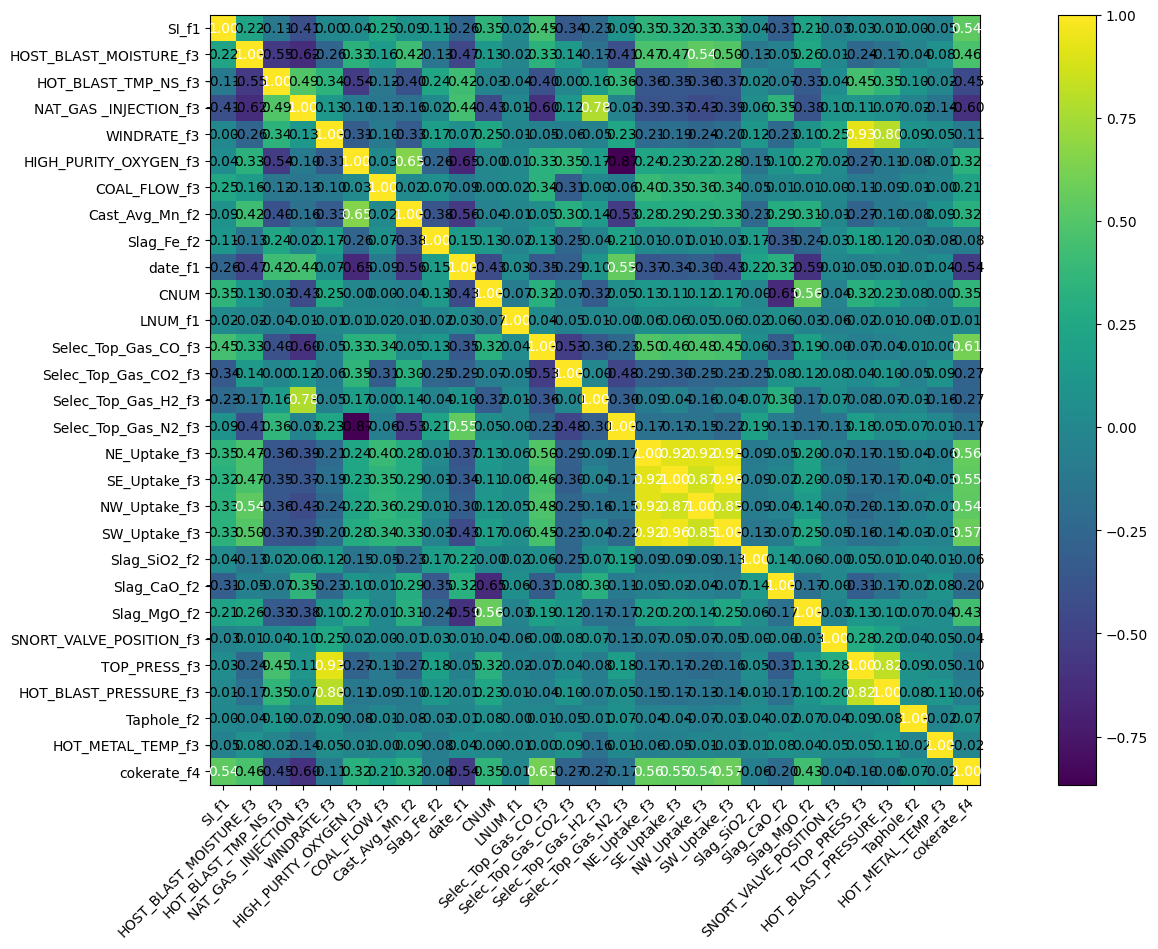

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## UCI data


In [15]:

tsDataWrangling_obj.read_UCI_data()


In [16]:

tsDataWrangling_obj.UCI_Energy_data_df 


date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4       RH_4  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  45.566667   
1      19.200000  44.722500  19.790000  44.790000  19.000000  45.992500   
2      19.200000  44.626667  19.790000  44.933333  18.926667  45.890000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  45.723333   
4      19.200000  44.530000  19.790000  45.000000  18.890000  45.530000   
...          ...        ...        ...        ...        ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  45.590000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  45.590000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  45.730000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  45.790000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  45.963333   

              T5       RH_5         T6       RH_6         T7       RH_7  \
0      17.166667  55.200000   7.026667  84.256667  17.200000  41.626667   
1      17.166667  55.200000   6.833333  84.063333  17.200000  41.560000   
2      17.166667  55.090000   6.560000  83.156667  17.200000  41.433333   
3      17.166667  55.090000   6.433333  83.423333  17.133333  41.290000   
4      17.200000  55.090000   6.366667  84.893333  17.200000  41.230000   
...          ...        ...        ...        ...        ...        ...   
19730  23.200000  52.400000  24.796667   1.000000  24.500000  44.500000   
19731  23.230000  52.326667  24.196667   1.000000  24.557143  44.414286   
19732  23.230000  52.266667  23.626667   1.000000  24.540000  44.400000   
19733  23.200000  52.200000  22.433333   1.000000  24.500000  44.295714   
19734  23.200000  52.200000  21.026667   1.000000  24.500000  44.054000   

            T8       RH_8         T9     RH_9      T_out  Press_mm_hg  \
0      18.2000  48.900000  17.033333  45.5300   6.600000        733.5   
1      18.2000  48.863333  17.066667  45.5600   6.483333        733.6   
2      18.2000  48.730000  17.000000  45.5000   6.366667        733.7   
3      18.1000  48.590000  17.000000  45.4000   6.250000        733.8   
4      18.1000  48.590000  17.000000  45.4000   6.133333        733.9   
...        ...        ...        ...      ...        ...          ...   
19730  24.7000  50.074000  23.200000  46.7900  22.733333        755.2   
19731  24.7000  49.790000  23.200000  46.7900  22.600000        755.2   
19732  24.7000  49.660000  23.200000  46.7900  22.466667        755.2   
19733  24.6625  49.518750  23.200000  46.8175  22.333333        755.2   
19734  24.7360  49.736000  23.200000  46.8450  22.200000        755.2   

          RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0      92.000000   7.000000   63.000000   5.300000  13.275433  13.275433  
1      92.000000   6.666667   59.166667   5.200000  18.606195  18.606195  
2      92.000000   6.333333   55.333333   5.100000  28.642668  28.642668  
3      92.000000   6.000000   51.500000   5.000000  45.410389  45.410389  
4      92.000000   5.666667   47.666667   4.900000  10.084097  10.084097  
...          ...        ... 

In [17]:

tsDataWrangling_obj.format_appliances_data_to_match_CIVS()


In [18]:

tsDataWrangling_obj.UCI_Energy_data_df


lights         T1  Appliances       RH_1         T2       RH_2  \
0          30  19.890000          60  47.596667  19.200000  44.790000   
1          30  19.890000          60  46.693333  19.200000  44.722500   
2          30  19.890000          50  46.300000  19.200000  44.626667   
3          40  19.890000          50  46.066667  19.200000  44.590000   
4          40  19.890000          60  46.333333  19.200000  44.530000   
...       ...        ...         ...        ...        ...        ...   
19730       0  25.566667         100  46.560000  25.890000  42.025714   
19731       0  25.500000          90  46.500000  25.754000  42.080000   
19732      10  25.500000         270  46.596667  25.628571  42.768571   
19733      10  25.500000         420  46.990000  25.414000  43.036000   
19734      10  25.500000         430  46.600000  25.264286  42.971429   

              T3       RH_3         T4       RH_4         T5       RH_5  \
0      19.790000  44.730000  19.000000  45.566667  17.166667  55.200000   
1      19.790000  44.790000  19.000000  45.992500  17.166667  55.200000   
2      19.790000  44.933333  18.926667  45.890000  17.166667  55.090000   
3      19.790000  45.000000  18.890000  45.723333  17.166667  55.090000   
4      19.790000  45.000000  18.890000  45.530000  17.200000  55.090000   
...          ...        ...        ...        ...        ...        ...   
19730  27.200000  41.163333  24.700000  45.590000  23.200000  52.400000   
19731  27.133333  41.223333  24.700000  45.590000  23.230000  52.326667   
19732  27.050000  41.690000  24.700000  45.730000  23.230000  52.266667   
19733  26.890000  41.290000  24.700000  45.790000  23.200000  52.200000   
19734  26.823333  41.156667  24.700000  45.963333  23.200000  52.200000   

              T6       RH_6         T7       RH_7       T8       RH_8  \
0       7.026667  84.256667  17.200000  41.626667  18.2000  48.900000   
1       6.833333  84.063333  17.200000  41.560000  18.2000  48.863333   
2       6.560000  83.156667  17.200000  41.433333  18.2000  48.730000   
3       6.433333  83.423333  17.133333  41.290000  18.1000  48.590000   
4       6.366667  84.893333  17.200000  41.230000  18.1000  48.590000   
...          ...        ...        ...        ...      ...        ...   
19730  24.796667   1.000000  24.500000  44.500000  24.7000  50.074000   
19731  24.196667   1.000000  24.557143  44.414286  24.7000  49.790000   
19732  23.626667   1.000000  24.540000  44.400000  24.7000  49.660000   
19733  22.433333   1.000000  24.500000  44.295714  24.6625  49.518750   
19734  21.026667   1.000000  24.500000  44.054000  24.7360  49.736000   

              T9     RH_9      T_out  Press_mm_hg     RH_out  Windspeed  \
0      17.033333  45.5300   6.600000        733.5  92.000000   7.000000   
1      17.066667  45.5600   6.483333        733.6  92.000000   6.666667   
2      17.000000  45.5000   6.366667        733.7  92.000000   6.333333   
3      17.000000  45.4000   6.250000        733.8  92.000000   6.000000   
4      17.000000  45.4000   6.133333        733.9  92.000000   5.666667   
...          ...      ...        ...          ...        ...        ...   
19730  23.200000  46.7900  22.733333        755.2  55.666667   3.333333   
19731  23.200000  46.7900  22.600000        755.2  56.000000   3.500000   
19732  23.200000  46.7900  22.466667        755.2  56.333333   3.666667   
19733  23.200000  46.8175  22.333333        755.2  56.666667   3.833333   
19734  23.200000  46.8450  22.200000        755.2  57.000000   4.000000   

       Visibility  Tdewpoint        rv1        rv2  
0       63.000000   5.300000  13.275433  13.275433  
1       59.166667   5.200000  18.606195  18.606195  
2       55.333333   5.100000  28.642668  28.642668  
3       51.500000   5.000000  45.410389  45.410389  
4       47.666667   4.900000  10.084097  10.084097  
...           ...        ...        ...        ...  
19730   23.666667  13.333333  43.096812  43.096812  
19731   24.500000  13.30000

In [19]:

print(list(tsDataWrangling_obj.UCI_Energy_data_df.columns))   


['lights', 'T1', 'Appliances', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [20]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.UCI_Energy_data_df



## Correlation Matrix


In [21]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['lights', 'T1', 'Appliances', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 
                        'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 
                        'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [22]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lights       19735 non-null  int64  
 1   T1           19735 non-null  float64
 2   Appliances   19735 non-null  int64  
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

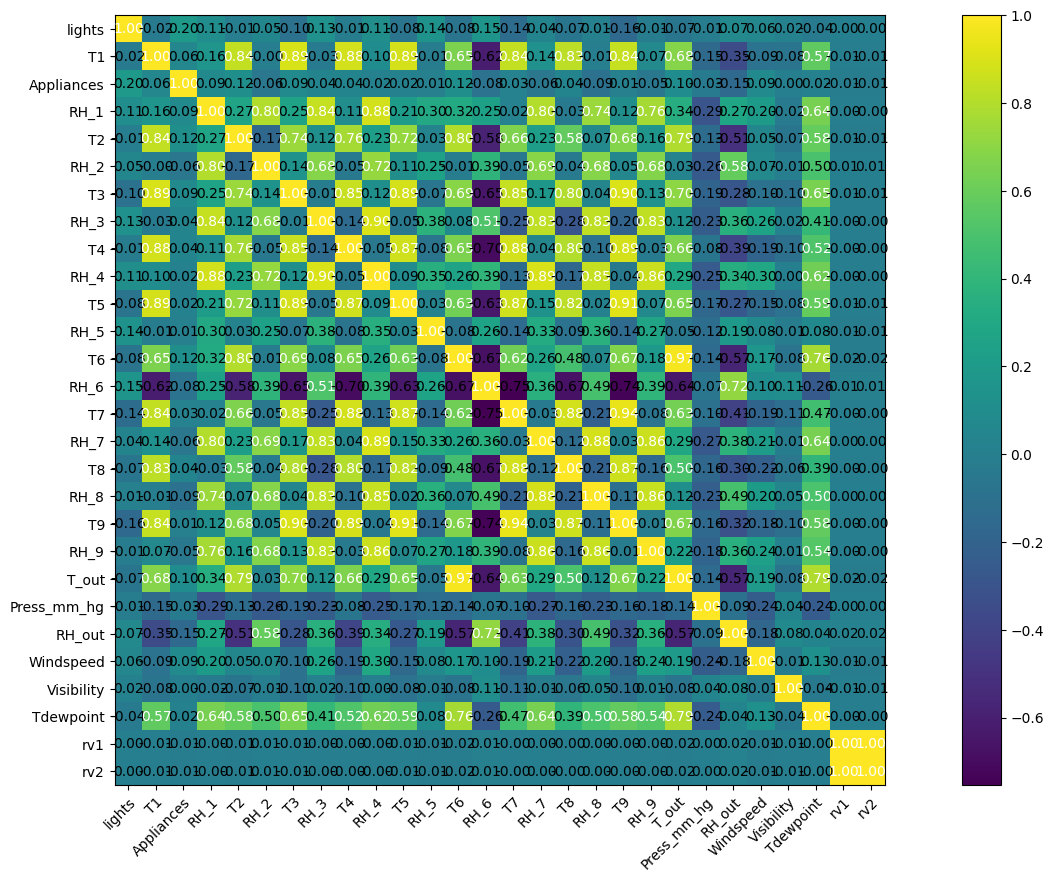

In [23]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [24]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


19735



## Training Functions


In [25]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [26]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [27]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [28]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [29]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        ## loss_SI     = F.mse_loss(    pred_si, y_si   )
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        ## loss_total  = alpha * loss_SI + (1 - alpha) * loss_all 
        
        ## alpha      = 0.9
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        ###################################################################################
        
        which_last = -1    ## -1 for 10, -3 for 8
        
        main_loss       = criterion(idx_pred[:, :], yb[:, :])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, which_last])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 50 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
        
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled





## Train on Train, Test on Test


In [30]:

inferenceGPT_obj.initialize_preds_lists()
inferenceGPT_obj.DPO_initialize_preds_lists()



## Run 1


In [31]:

( 
  chunk400to500_train, 
  chunk300to500_train, 
  chunk200to500_train, 
  chunk100to500_train, 
  chunk000to500_train, 
  test_CIVS
) = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.165043
Loss_SI: 1.4047571420669556 Loss_all: 1.1586558818817139
===
[50] Train Loss: 0.174347
Loss_SI: 0.4038746953010559 Loss_all: 0.16990159451961517
===


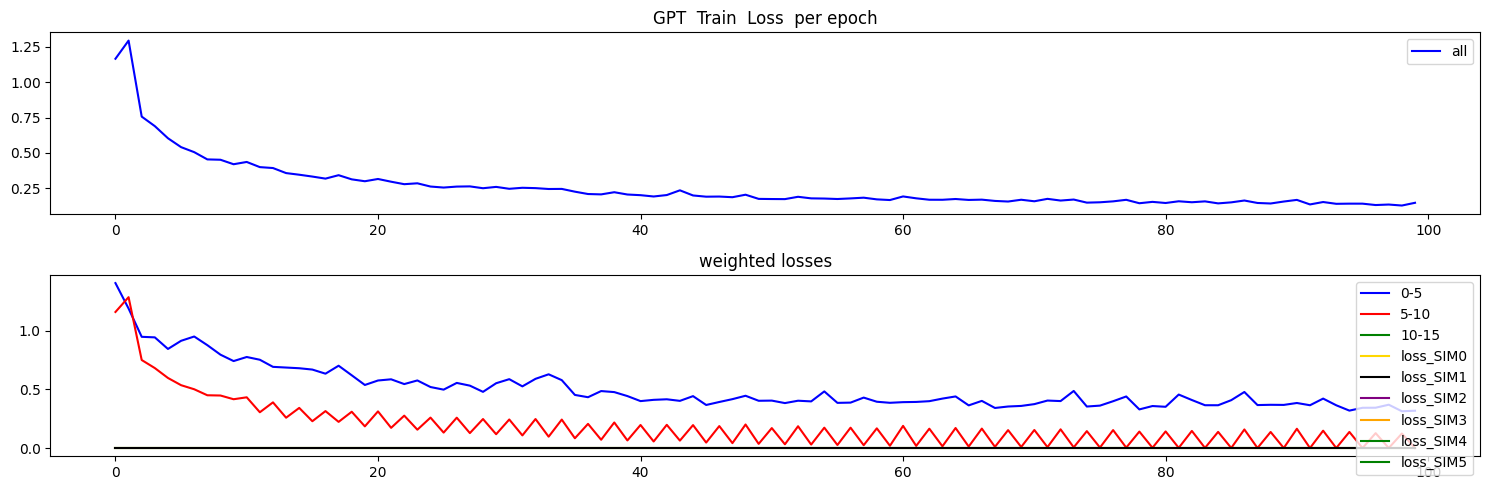

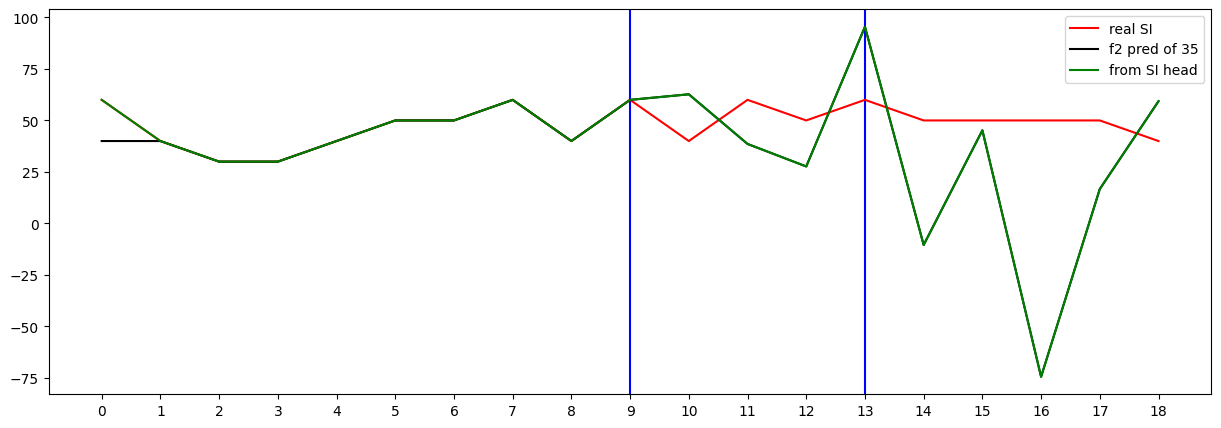

Testing R**2 - (all) - (no inputs):  0.9935951359529496
Testing R**2 - (f2) - SI full (no inputs):  -63.59418582729211
Testing R**2 - SI head only (no inputs):  -63.59418582729211
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0
3 ...t step R**2 (no inputs):  -0.49999997138977115
4 ...t step R**2 (no inputs):  -1.0
5 ...t step R**2 (no inputs):  -0.0714285714285714
6 ...t step R**2 (no inputs):  0.25
7 ...t step R**2 (no inputs):  0.4615384633160202
8 ...t step R**2 (no inputs):  -0.06666666666666665
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -9.115906677172704
2 ...index R**2 (no inputs):  -63.59418582729211
3 ...index R**2 (no inputs):  -380.650195385279
4 ...index R**2 (no inputs):  -10.208986406622058
5 ...index R**2 (no inputs):  -2606.85590702128
6 ...index R**2 (no inputs):  -579.3659353113355
7 ...index R**2 (no inputs):  -126.68445826579486
8 ...index R**2 (no inputs):  -10.067900133747091
9 ...index R**2 (no inputs):  -55.23058480058

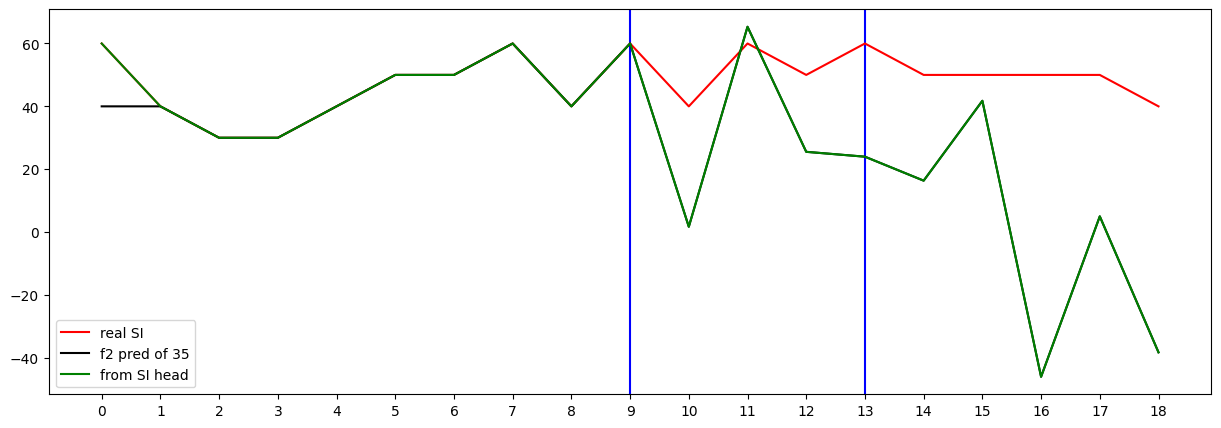

Testing R**2 - (all) - (no inputs):  0.9932585516563236
Testing R**2 - (f2) - SI full (no inputs):  -74.3686682890652
Testing R**2 - SI head only (no inputs):  -74.3686682890652
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0
3 ...t step R**2 (no inputs):  -0.49999997138977115
4 ...t step R**2 (no inputs):  -1.0
5 ...t step R**2 (no inputs):  -0.0714285714285714
6 ...t step R**2 (no inputs):  0.25
7 ...t step R**2 (no inputs):  0.4615384633160202
8 ...t step R**2 (no inputs):  -0.06666666666666665
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -2.319600002289896
2 ...index R**2 (no inputs):  -74.3686682890652
3 ...index R**2 (no inputs):  -54.05989809773112
4 ...index R**2 (no inputs):  -0.9437335192786425
5 ...index R**2 (no inputs):  -461.64960517833026
6 ...index R**2 (no inputs):  -248.6916219913959
7 ...index R**2 (no inputs):  -52.20084487700681
8 ...index R**2 (no inputs):  -0.8884907104650785
9 ...index R**2 (no inputs):  -22.894174978094

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk400to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 

res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, model_DPO , x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_400to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_400to500.append( res_pred )


[0] Train Loss: 1.338080
Loss_SI: 1.452241063117981 Loss_all: 1.3312565088272095
===
[50] Train Loss: 0.220900
Loss_SI: 0.5362944602966309 Loss_all: 0.21860651671886444
===


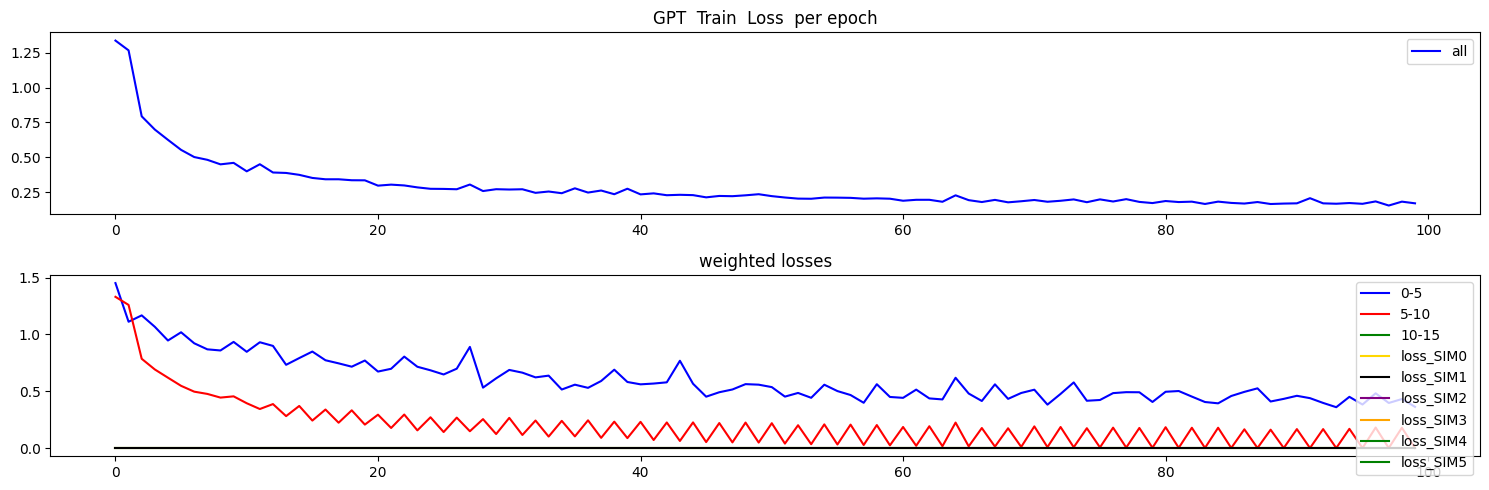

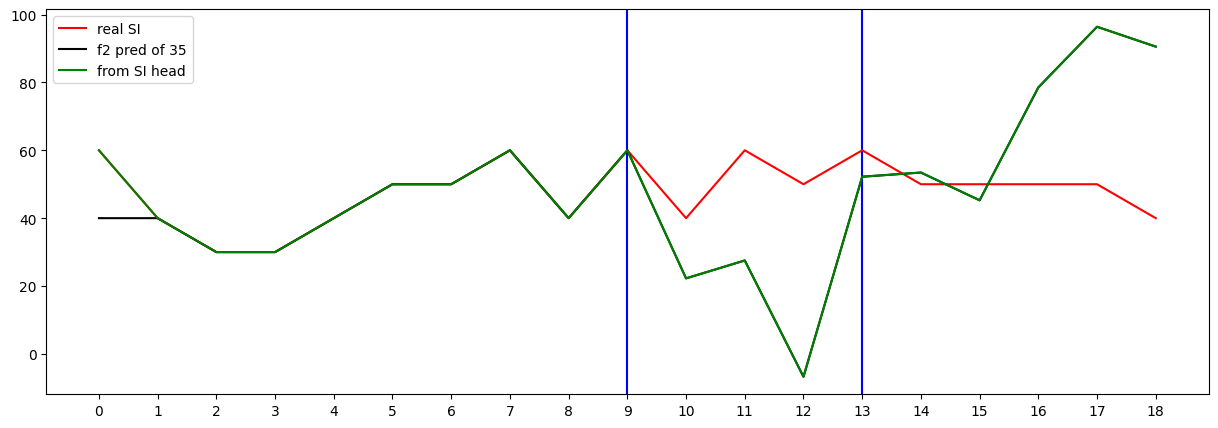

Testing R**2 - (all) - (no inputs):  0.9962556820249874
Testing R**2 - (f2) - SI full (no inputs):  -30.92711457578853
Testing R**2 - SI head only (no inputs):  -30.92711457578853
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0
3 ...t step R**2 (no inputs):  -0.49999997138977115
4 ...t step R**2 (no inputs):  -1.0
5 ...t step R**2 (no inputs):  -0.0714285714285714
6 ...t step R**2 (no inputs):  0.25
7 ...t step R**2 (no inputs):  0.4615384633160202
8 ...t step R**2 (no inputs):  -0.06666666666666665
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -2.367539945713019
2 ...index R**2 (no inputs):  -30.92711457578853
3 ...index R**2 (no inputs):  -152.82297834484243
4 ...index R**2 (no inputs):  -1.318821859728915
5 ...index R**2 (no inputs):  -1589.9844082828968
6 ...index R**2 (no inputs):  -683.4079179813068
7 ...index R**2 (no inputs):  -199.94129180596582
8 ...index R**2 (no inputs):  -2.8802622563543023
9 ...index R**2 (no inputs):  -73.49730548

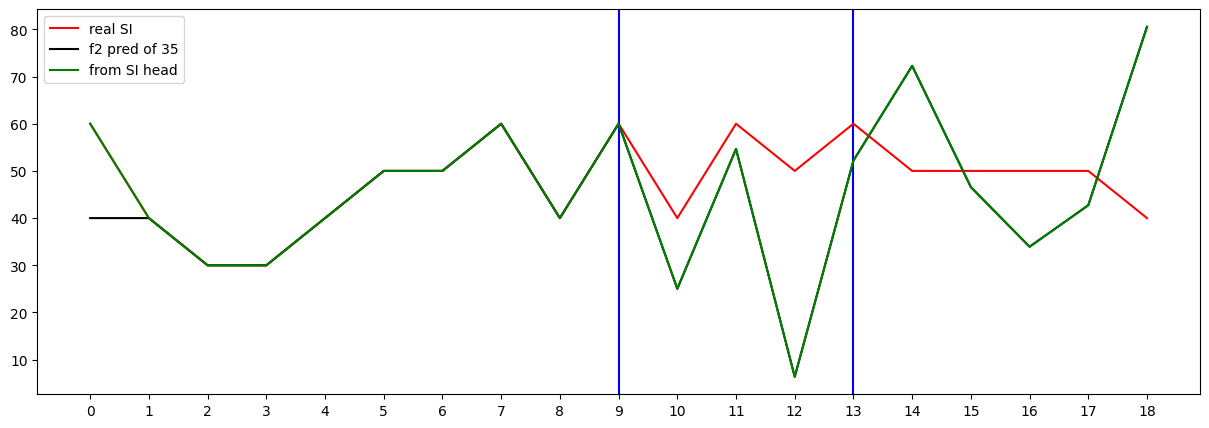

Testing R**2 - (all) - (no inputs):  0.9972215701354786
Testing R**2 - (f2) - SI full (no inputs):  -13.962206206876967
Testing R**2 - SI head only (no inputs):  -13.962206206876967
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0
3 ...t step R**2 (no inputs):  -0.49999997138977115
4 ...t step R**2 (no inputs):  -1.0
5 ...t step R**2 (no inputs):  -0.0714285714285714
6 ...t step R**2 (no inputs):  0.25
7 ...t step R**2 (no inputs):  0.4615384633160202
8 ...t step R**2 (no inputs):  -0.06666666666666665
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -13.064615103510516
2 ...index R**2 (no inputs):  -13.962206206876967
3 ...index R**2 (no inputs):  -672.0499029354753
4 ...index R**2 (no inputs):  -5.767398169836766
5 ...index R**2 (no inputs):  -5303.237373774486
6 ...index R**2 (no inputs):  -1376.6459808994432
7 ...index R**2 (no inputs):  -441.8086678259011
8 ...index R**2 (no inputs):  -9.50781770789942
9 ...index R**2 (no inputs):  -147.6550500

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_300to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_300to500.append( res_pred )



[0] Train Loss: 1.357942
Loss_SI: 1.2635616064071655 Loss_all: 1.3515311479568481
===
[50] Train Loss: 0.221947
Loss_SI: 0.43201228976249695 Loss_all: 0.2200392335653305
===


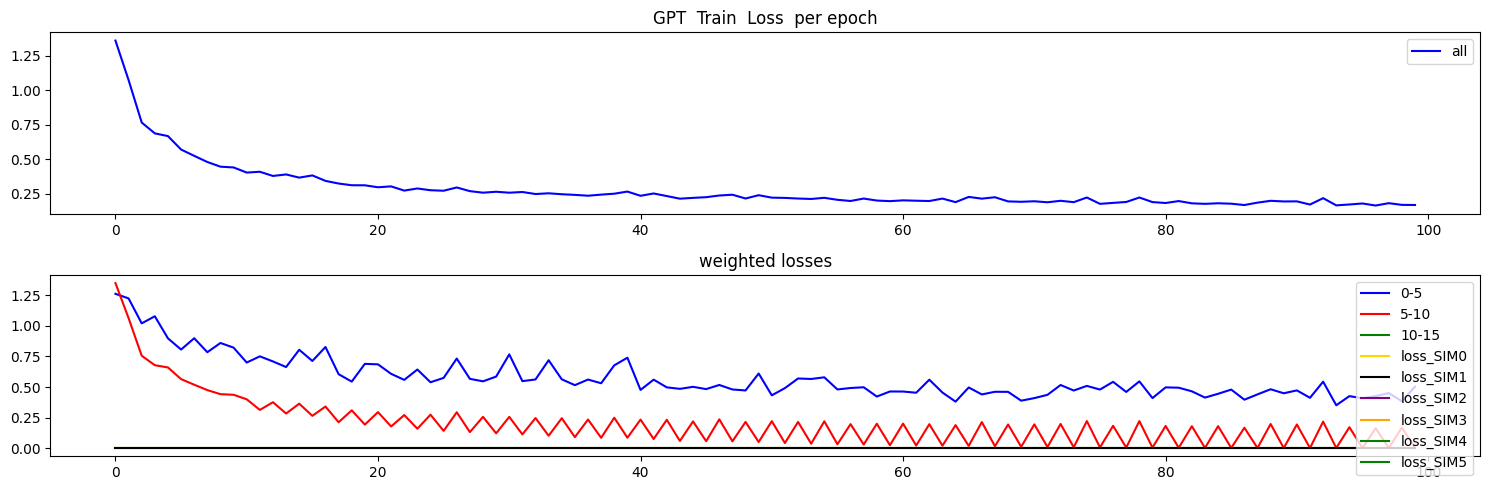

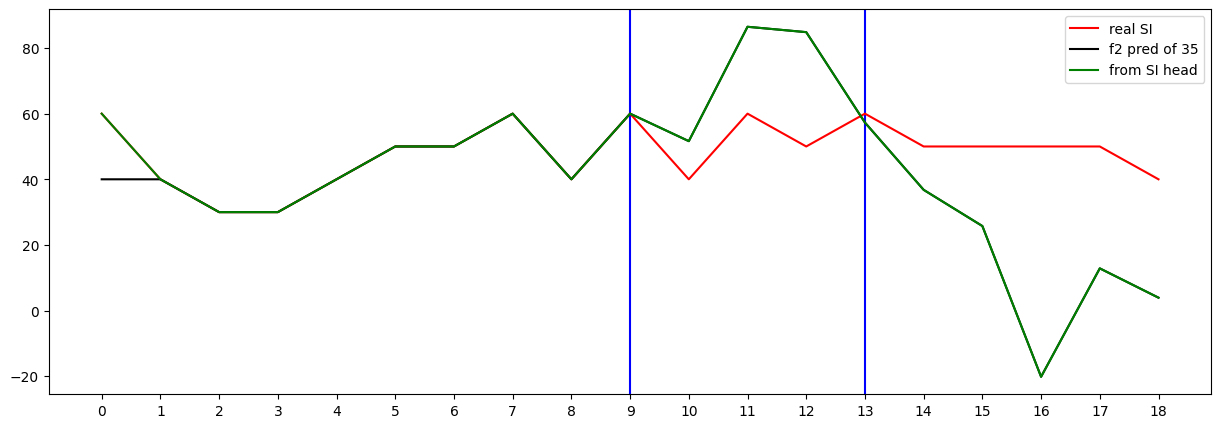

Testing R**2 - (all) - (no inputs):  0.9965324195335603
Testing R**2 - (f2) - SI full (no inputs):  -31.724255085025185
Testing R**2 - SI head only (no inputs):  -31.724255085025185
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0
3 ...t step R**2 (no inputs):  -0.49999997138977115
4 ...t step R**2 (no inputs):  -1.0
5 ...t step R**2 (no inputs):  -0.0714285714285714
6 ...t step R**2 (no inputs):  0.25
7 ...t step R**2 (no inputs):  0.4615384633160202
8 ...t step R**2 (no inputs):  -0.06666666666666665
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -14.148055563661337
2 ...index R**2 (no inputs):  -31.724255085025185
3 ...index R**2 (no inputs):  -27.549377994838352
4 ...index R**2 (no inputs):  -4.134788701310769
5 ...index R**2 (no inputs):  -411.6991900682519
6 ...index R**2 (no inputs):  -203.44296125495617
7 ...index R**2 (no inputs):  -40.8146538669304
8 ...index R**2 (no inputs):  -13.269898296651856
9 ...index R**2 (no inputs):  -101.94046

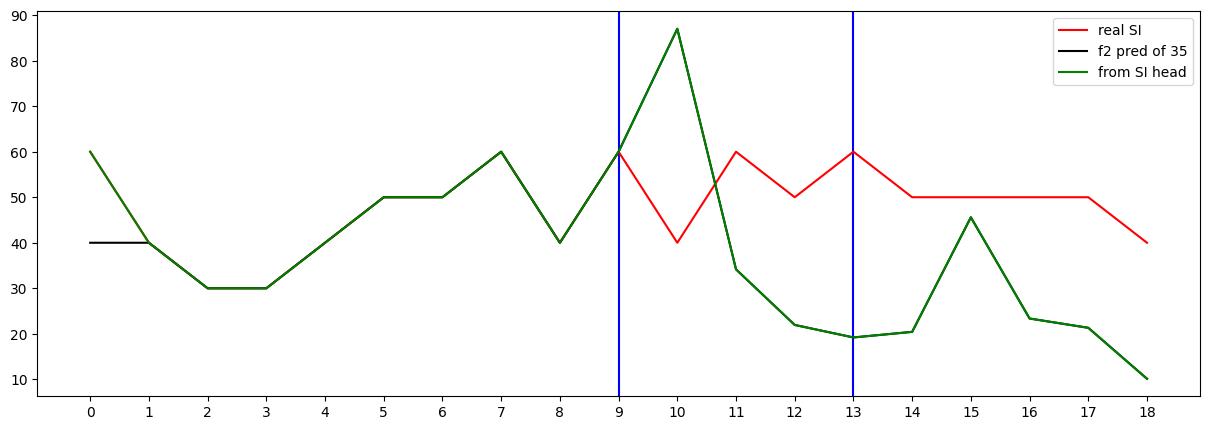

Testing R**2 - (all) - (no inputs):  0.996719879647381
Testing R**2 - (f2) - SI full (no inputs):  -20.99143188157345
Testing R**2 - SI head only (no inputs):  -20.99143188157345
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0
3 ...t step R**2 (no inputs):  -0.49999997138977115
4 ...t step R**2 (no inputs):  -1.0
5 ...t step R**2 (no inputs):  -0.0714285714285714
6 ...t step R**2 (no inputs):  0.25
7 ...t step R**2 (no inputs):  0.4615384633160202
8 ...t step R**2 (no inputs):  -0.06666666666666665
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -2.042282108679535
2 ...index R**2 (no inputs):  -20.99143188157345
3 ...index R**2 (no inputs):  -83.31563523954266
4 ...index R**2 (no inputs):  -5.133969911134117
5 ...index R**2 (no inputs):  -1853.9625344924118
6 ...index R**2 (no inputs):  -226.95115620948445
7 ...index R**2 (no inputs):  -5.423684743232438
8 ...index R**2 (no inputs):  -3.5560979377335036
9 ...index R**2 (no inputs):  -52.1199031664

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, model_DPO, x_means, x_standard_devs, 9  )
    inferenceGPT_obj.DPO_all_real_si_200to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_200to500.append( res_pred )


[0] Train Loss: 1.344548
Loss_SI: 1.3100448846817017 Loss_all: 1.3376970291137695
===
[50] Train Loss: 0.215189
Loss_SI: 0.49333029985427856 Loss_all: 0.21283558011054993
===


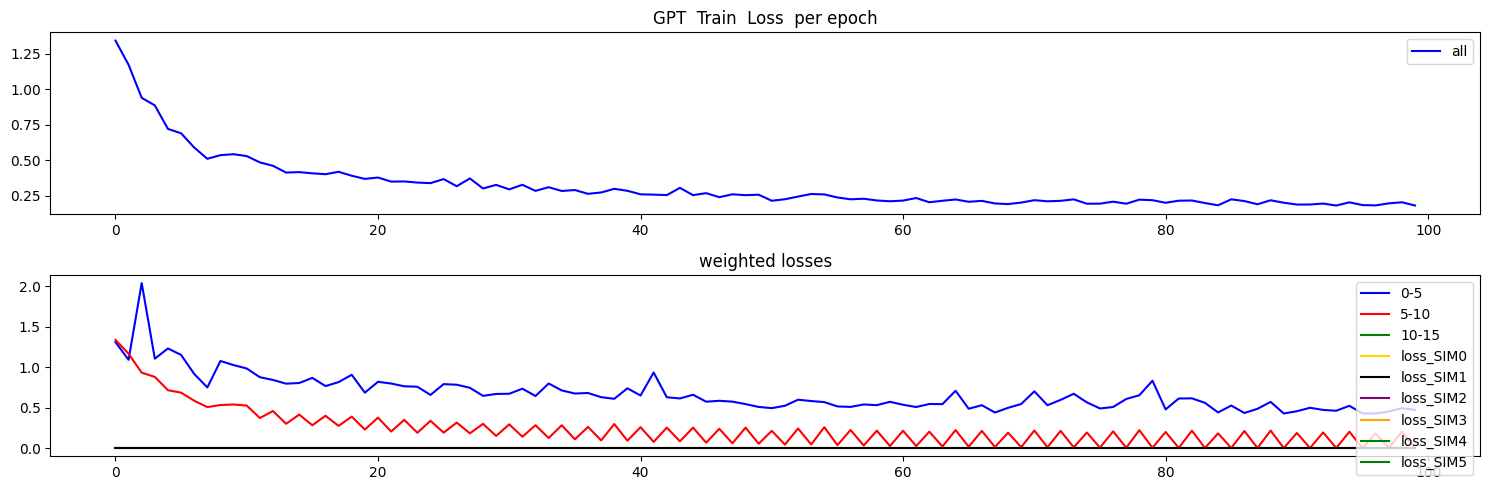

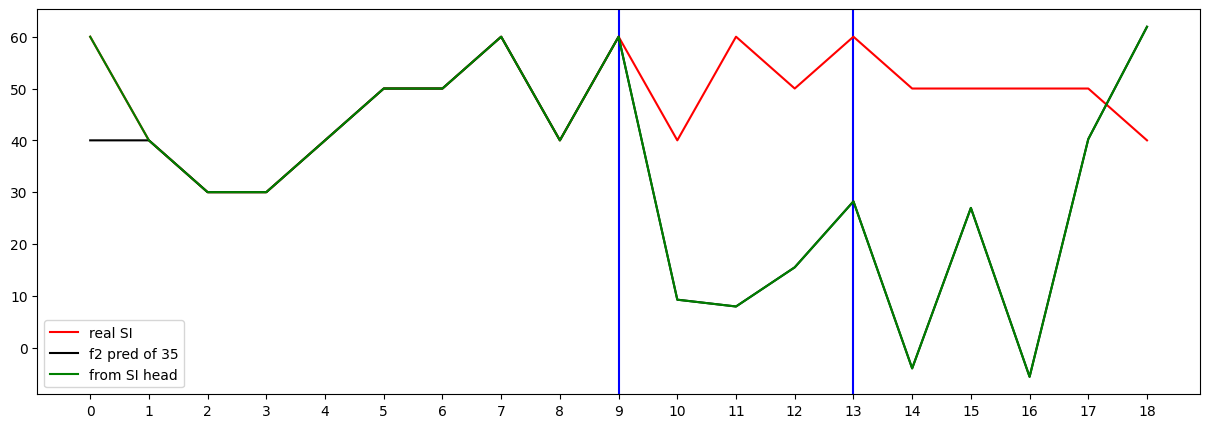

Testing R**2 - (all) - (no inputs):  0.9959123951318036
Testing R**2 - (f2) - SI full (no inputs):  -36.52815714268629
Testing R**2 - SI head only (no inputs):  -36.52815714268629
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0
3 ...t step R**2 (no inputs):  -0.49999997138977115
4 ...t step R**2 (no inputs):  -1.0
5 ...t step R**2 (no inputs):  -0.0714285714285714
6 ...t step R**2 (no inputs):  0.25
7 ...t step R**2 (no inputs):  0.4615384633160202
8 ...t step R**2 (no inputs):  -0.06666666666666665
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -2.7688281909336423
2 ...index R**2 (no inputs):  -36.52815714268629
3 ...index R**2 (no inputs):  -159.18762861429687
4 ...index R**2 (no inputs):  -6.017610265767525
5 ...index R**2 (no inputs):  -313.9020367965433
6 ...index R**2 (no inputs):  -256.8541457857589
7 ...index R**2 (no inputs):  -144.33368109955777
8 ...index R**2 (no inputs):  -2.573010485700602
9 ...index R**2 (no inputs):  -15.169823496

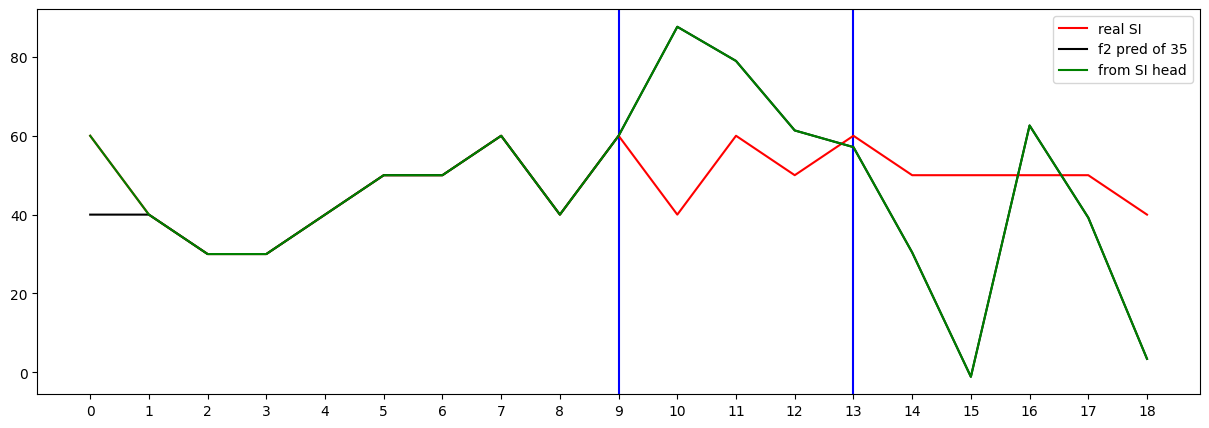

Testing R**2 - (all) - (no inputs):  0.9970232070931665
Testing R**2 - (f2) - SI full (no inputs):  -21.545694973556007
Testing R**2 - SI head only (no inputs):  -21.545694973556007
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0
3 ...t step R**2 (no inputs):  -0.49999997138977115
4 ...t step R**2 (no inputs):  -1.0
5 ...t step R**2 (no inputs):  -0.0714285714285714
6 ...t step R**2 (no inputs):  0.25
7 ...t step R**2 (no inputs):  0.4615384633160202
8 ...t step R**2 (no inputs):  -0.06666666666666665
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -2.7941787664414166
2 ...index R**2 (no inputs):  -21.545694973556007
3 ...index R**2 (no inputs):  -162.59582070202654
4 ...index R**2 (no inputs):  -6.6512355620476695
5 ...index R**2 (no inputs):  -183.485406540868
6 ...index R**2 (no inputs):  -180.451422280824
7 ...index R**2 (no inputs):  -249.34425570600402
8 ...index R**2 (no inputs):  -1.513590610710661
9 ...index R**2 (no inputs):  -10.4452952

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to500_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_100to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_100to500.append( res_pred )
    
    
    

[0] Train Loss: 1.346886
Loss_SI: 1.3703018426895142 Loss_all: 1.3401697874069214
===
[50] Train Loss: 0.285118
Loss_SI: 0.5145050883293152 Loss_all: 0.28289589285850525
===


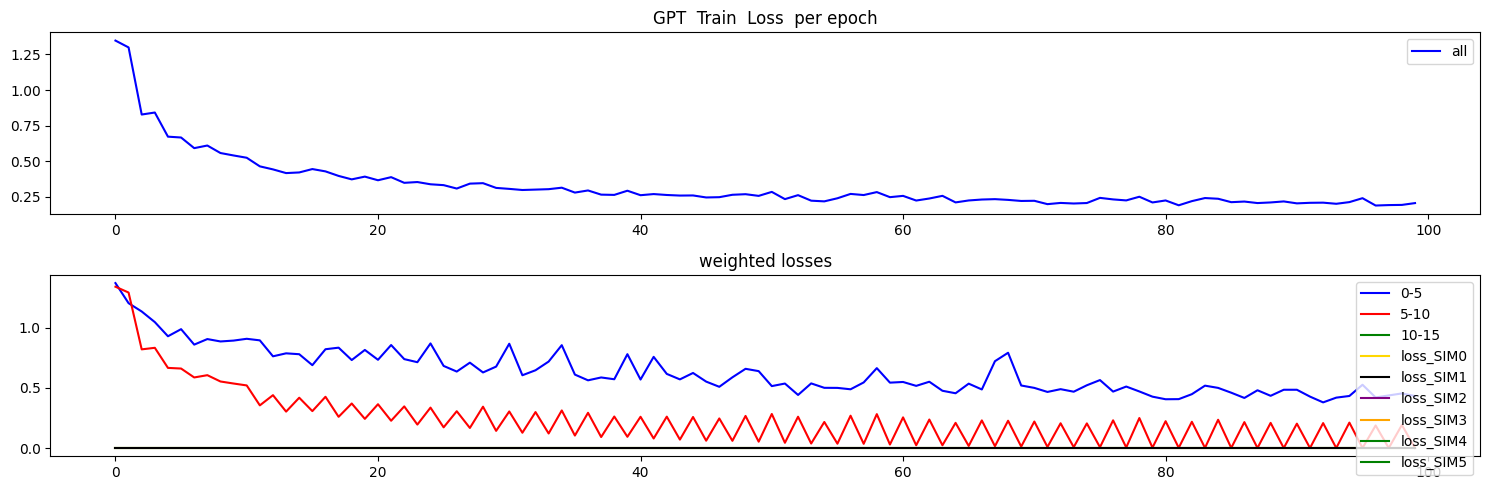

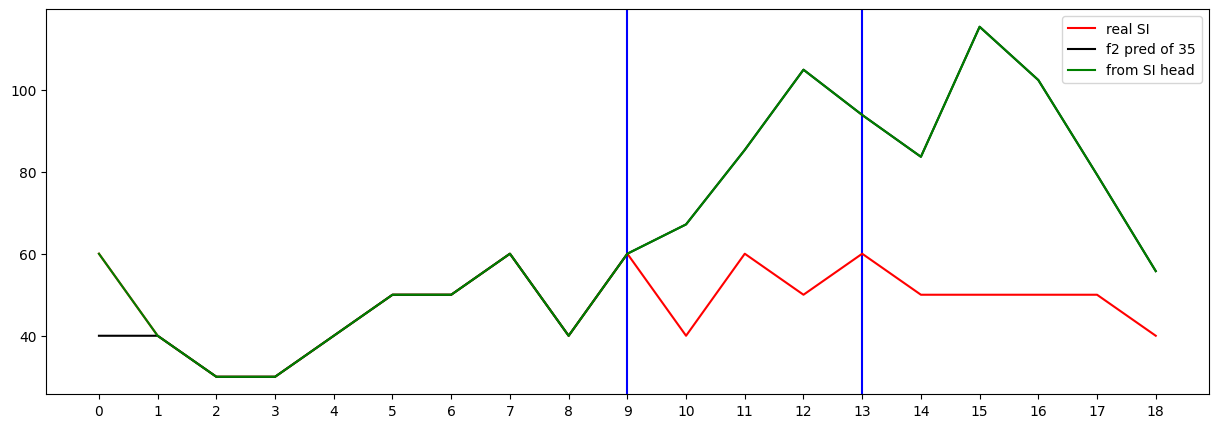

Testing R**2 - (all) - (no inputs):  0.9956935653522175
Testing R**2 - (f2) - SI full (no inputs):  -40.982013808639984
Testing R**2 - SI head only (no inputs):  -40.982013808639984
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0
3 ...t step R**2 (no inputs):  -0.5
4 ...t step R**2 (no inputs):  -1.0
5 ...t step R**2 (no inputs):  -0.07142841572650638
6 ...t step R**2 (no inputs):  0.2500001907350634
7 ...t step R**2 (no inputs):  0.461538586560152
8 ...t step R**2 (no inputs):  -0.06666678059901399
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -10.776333863682458
2 ...index R**2 (no inputs):  -40.982013808639984
3 ...index R**2 (no inputs):  -92.78823402836348
4 ...index R**2 (no inputs):  -7.849933971772847
5 ...index R**2 (no inputs):  -180.54372420725295
6 ...index R**2 (no inputs):  -740.2407065987225
7 ...index R**2 (no inputs):  -174.48752194396835
8 ...index R**2 (no inputs):  -26.70736063668747
9 ...index R**2 (no inputs):  -13.52165530

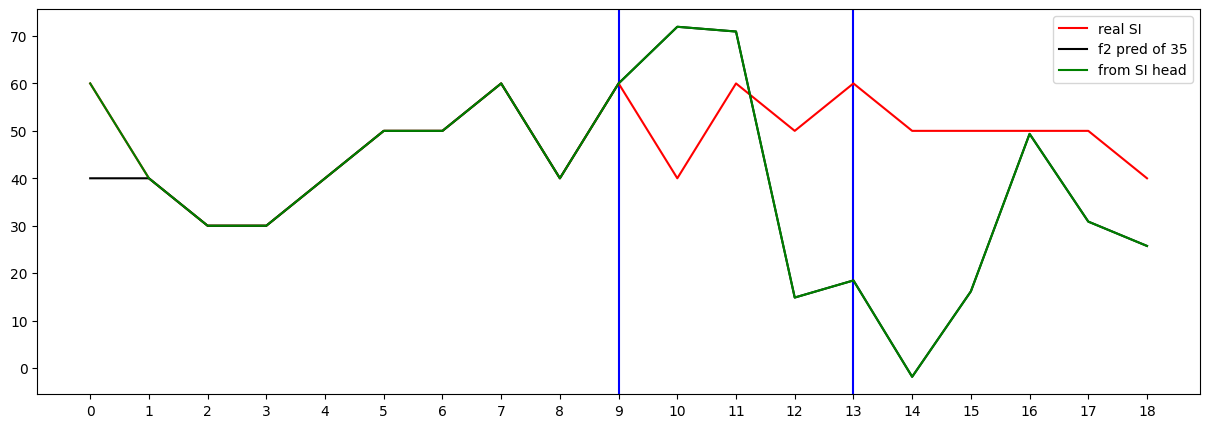

Testing R**2 - (all) - (no inputs):  0.997145262405398
Testing R**2 - (f2) - SI full (no inputs):  -23.482785481449945
Testing R**2 - SI head only (no inputs):  -23.482785481449945
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0
3 ...t step R**2 (no inputs):  -0.5
4 ...t step R**2 (no inputs):  -1.0
5 ...t step R**2 (no inputs):  -0.07142841572650638
6 ...t step R**2 (no inputs):  0.2500001907350634
7 ...t step R**2 (no inputs):  0.461538586560152
8 ...t step R**2 (no inputs):  -0.06666678059901399
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -15.317866361150461
2 ...index R**2 (no inputs):  -23.482785481449945
3 ...index R**2 (no inputs):  -75.10097163122897
4 ...index R**2 (no inputs):  0.17662921437801848
5 ...index R**2 (no inputs):  -592.0560837780587
6 ...index R**2 (no inputs):  -246.9652600238082
7 ...index R**2 (no inputs):  -61.49452839570326
8 ...index R**2 (no inputs):  -3.7289432293745435
9 ...index R**2 (no inputs):  -179.47138947

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_000to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_000to500.append( res_pred )



## Run 2


In [37]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.284574
Loss_SI: 1.4559139013290405 Loss_all: 1.2779253721237183
===
[50] Train Loss: 0.199915
Loss_SI: 0.7826915383338928 Loss_all: 0.19776535034179688
===


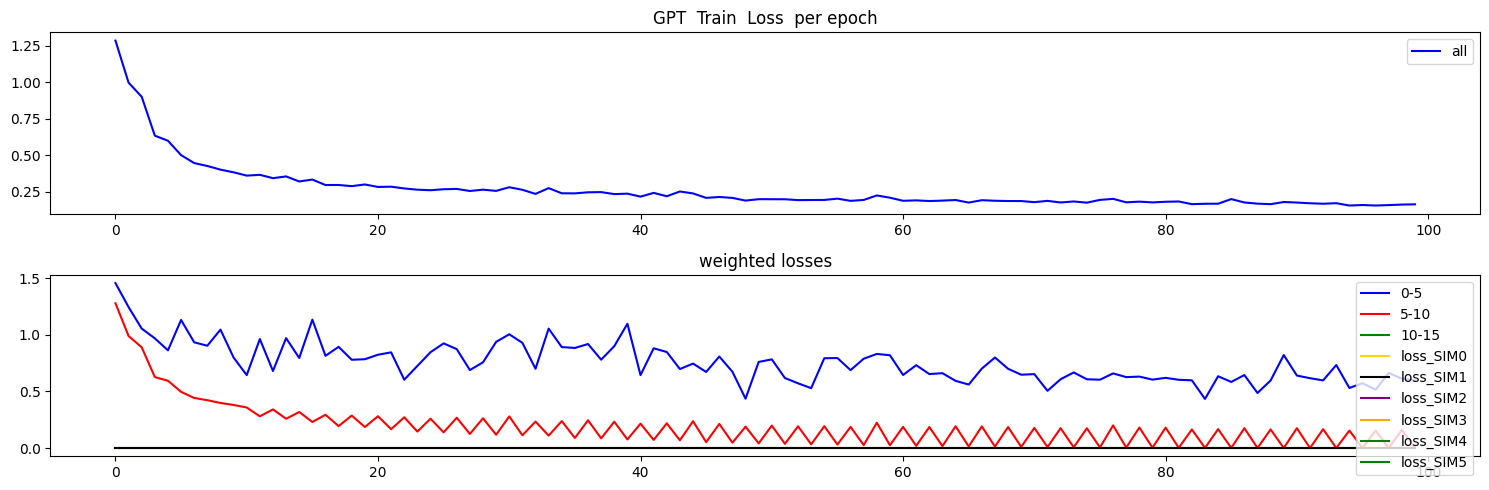

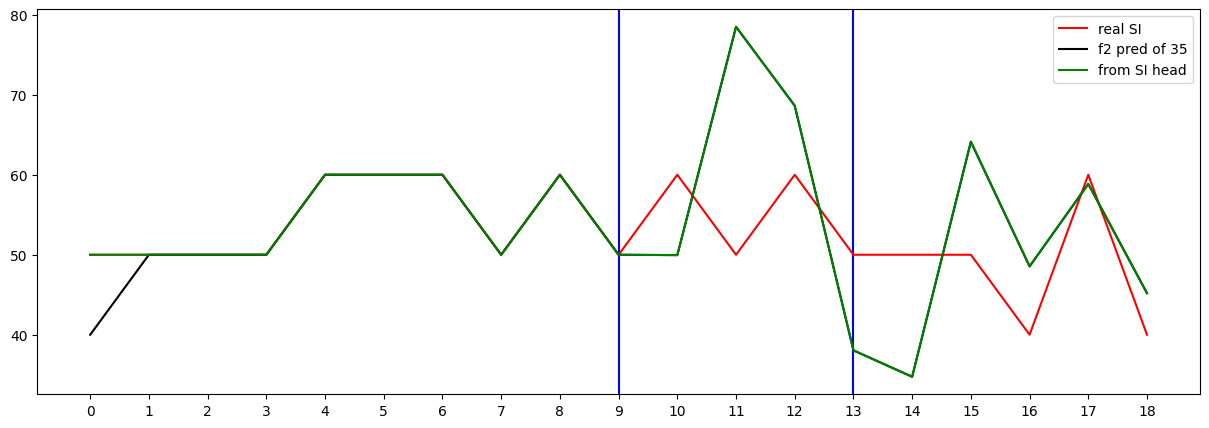

Testing R**2 - (all) - (no inputs):  0.9987445920664184
Testing R**2 - (f2) - SI full (no inputs):  -4.39317838037794
Testing R**2 - SI head only (no inputs):  -4.39317838037794
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  0.0
3 ...t step R**2 (no inputs):  0.0
4 ...t step R**2 (no inputs):  -1.6666666666666665
5 ...t step R**2 (no inputs):  -0.6666666666666667
6 ...t step R**2 (no inputs):  -0.33333333333333326
7 ...t step R**2 (no inputs):  -0.7500000166893006
8 ...t step R**2 (no inputs):  -1.0
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -11.155161029535778
2 ...index R**2 (no inputs):  -4.39317838037794
3 ...index R**2 (no inputs):  -37.76617447622687
4 ...index R**2 (no inputs):  -14.133634616561654
5 ...index R**2 (no inputs):  -64.78778321054496
6 ...index R**2 (no inputs):  0.0
7 ...index R**2 (no inputs):  -11.224230676835177
8 ...index R**2 (no inputs):  -5.532957496189243
9 ...index R**2 (no inputs):  -19.70540257979509
10 ...index R*

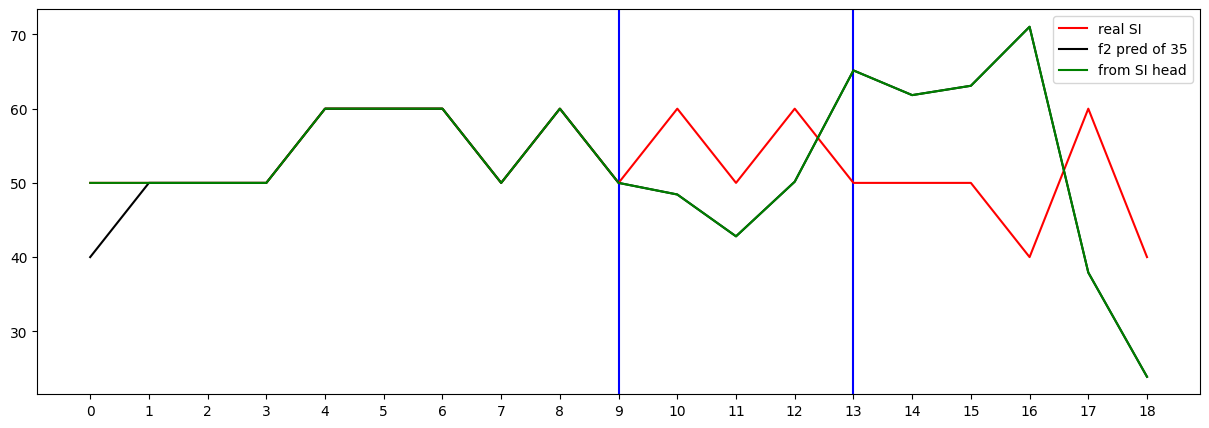

Testing R**2 - (all) - (no inputs):  0.9988514938420965
Testing R**2 - (f2) - SI full (no inputs):  -4.023001469159499
Testing R**2 - SI head only (no inputs):  -4.023001469159499
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  0.0
3 ...t step R**2 (no inputs):  0.0
4 ...t step R**2 (no inputs):  -1.6666666666666665
5 ...t step R**2 (no inputs):  -0.6666666666666667
6 ...t step R**2 (no inputs):  -0.33333333333333326
7 ...t step R**2 (no inputs):  -0.7500000166893006
8 ...t step R**2 (no inputs):  -1.0
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -15.446308725973765
2 ...index R**2 (no inputs):  -4.023001469159499
3 ...index R**2 (no inputs):  -20.460685317604256
4 ...index R**2 (no inputs):  -22.836374825682977
5 ...index R**2 (no inputs):  -41.90890913972968
6 ...index R**2 (no inputs):  0.0
7 ...index R**2 (no inputs):  -9.238713204305993
8 ...index R**2 (no inputs):  -4.641518269353248
9 ...index R**2 (no inputs):  -16.01095591514431
10 ...index

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk400to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_400to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_400to500.append( res_pred )


[0] Train Loss: 1.336147
Loss_SI: 1.5345572233200073 Loss_all: 1.3295822143554688
===
[50] Train Loss: 0.243074
Loss_SI: 0.6704278588294983 Loss_all: 0.24086396396160126
===


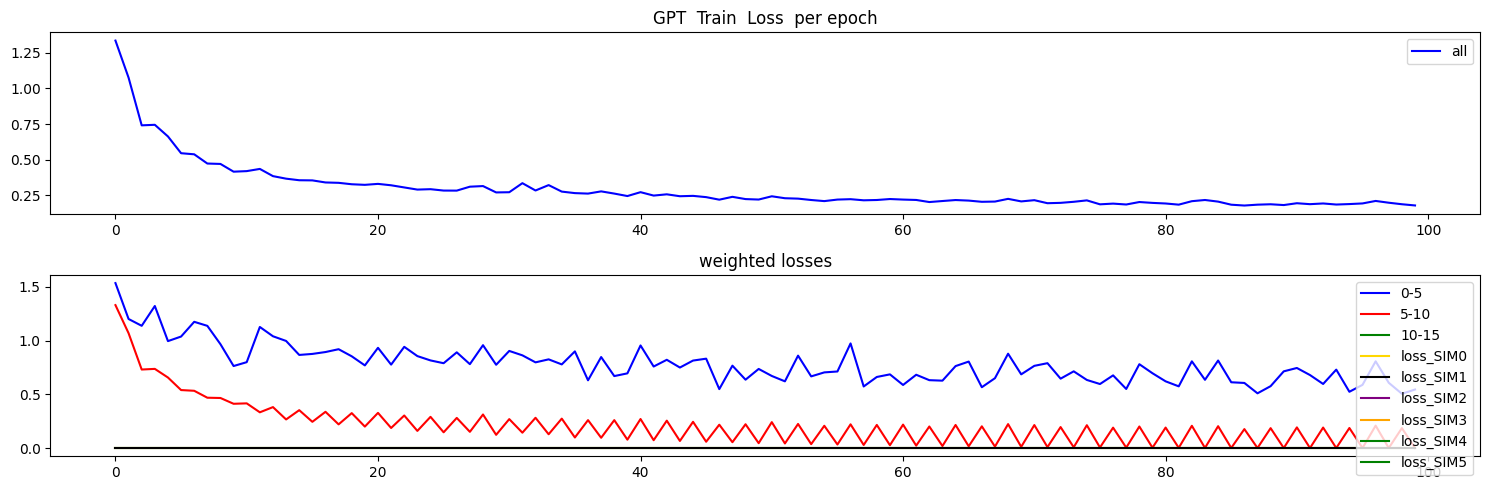

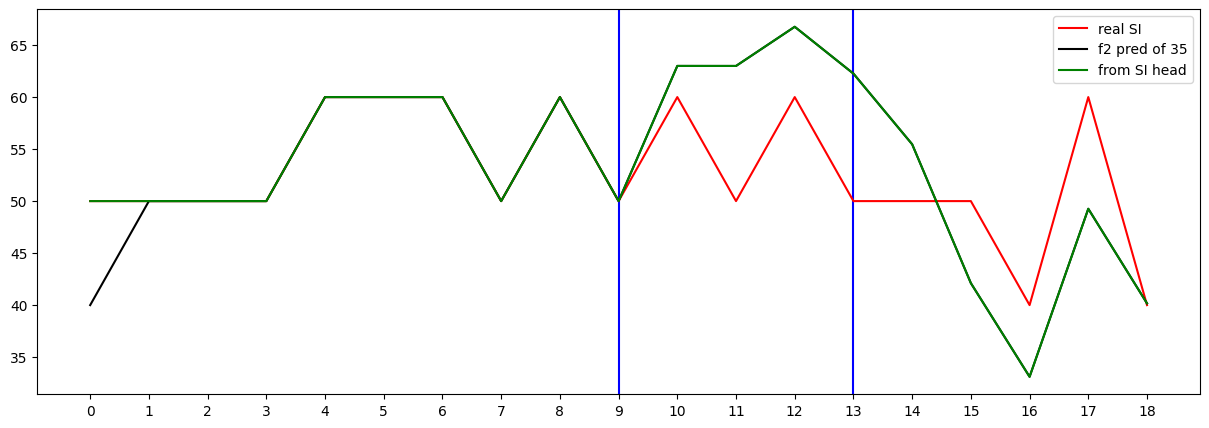

Testing R**2 - (all) - (no inputs):  0.9990486556422924
Testing R**2 - (f2) - SI full (no inputs):  -2.8716230607032776
Testing R**2 - SI head only (no inputs):  -2.8716230607032776
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  0.0
3 ...t step R**2 (no inputs):  0.0
4 ...t step R**2 (no inputs):  -1.6666666666666665
5 ...t step R**2 (no inputs):  -0.6666666666666667
6 ...t step R**2 (no inputs):  -0.33333333333333326
7 ...t step R**2 (no inputs):  -0.7500000166893006
8 ...t step R**2 (no inputs):  -1.0
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -10.476010522002422
2 ...index R**2 (no inputs):  -2.8716230607032776
3 ...index R**2 (no inputs):  -39.104632227229075
4 ...index R**2 (no inputs):  -44.67710564865642
5 ...index R**2 (no inputs):  -15.341586838935168
6 ...index R**2 (no inputs):  0.0
7 ...index R**2 (no inputs):  -1.5458803690331342
8 ...index R**2 (no inputs):  -3.4466122427152053
9 ...index R**2 (no inputs):  -24.068311788599566
10 ..

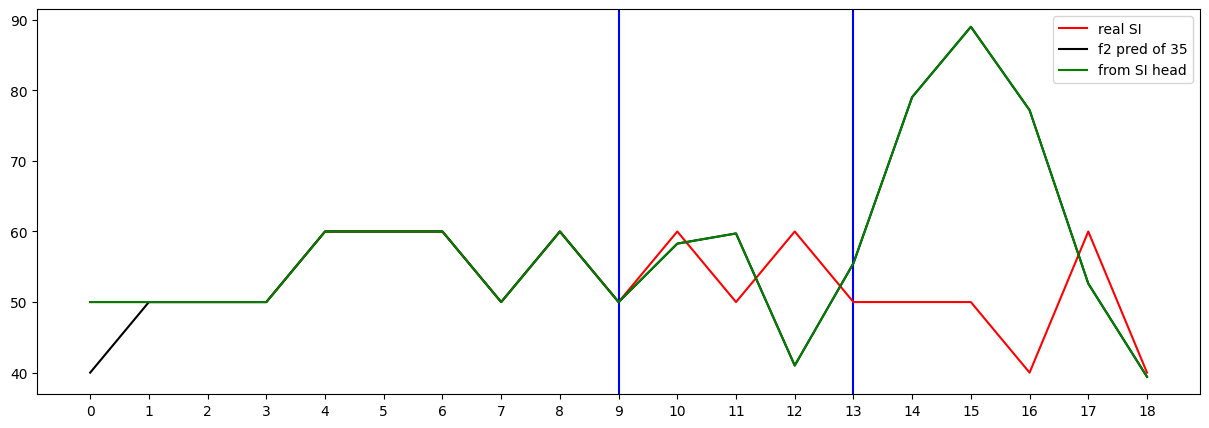

Testing R**2 - (all) - (no inputs):  0.9984318637222921
Testing R**2 - (f2) - SI full (no inputs):  -8.981619783546776
Testing R**2 - SI head only (no inputs):  -8.981619783546776
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  0.0
3 ...t step R**2 (no inputs):  0.0
4 ...t step R**2 (no inputs):  -1.6666666666666665
5 ...t step R**2 (no inputs):  -0.6666666666666667
6 ...t step R**2 (no inputs):  -0.33333333333333326
7 ...t step R**2 (no inputs):  -0.7500000166893006
8 ...t step R**2 (no inputs):  -1.0
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -32.35696981799557
2 ...index R**2 (no inputs):  -8.981619783546776
3 ...index R**2 (no inputs):  -117.91027513070897
4 ...index R**2 (no inputs):  -69.59178409620819
5 ...index R**2 (no inputs):  -32.66675507820156
6 ...index R**2 (no inputs):  0.0
7 ...index R**2 (no inputs):  -14.033972208319872
8 ...index R**2 (no inputs):  -4.50135794788467
9 ...index R**2 (no inputs):  -45.129650316487364
10 ...index 

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_300to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_300to500.append( res_pred )



[0] Train Loss: 1.327592
Loss_SI: 1.3678737878799438 Loss_all: 1.3210511207580566
===
[50] Train Loss: 0.231638
Loss_SI: 0.8118621110916138 Loss_all: 0.22927993535995483
===


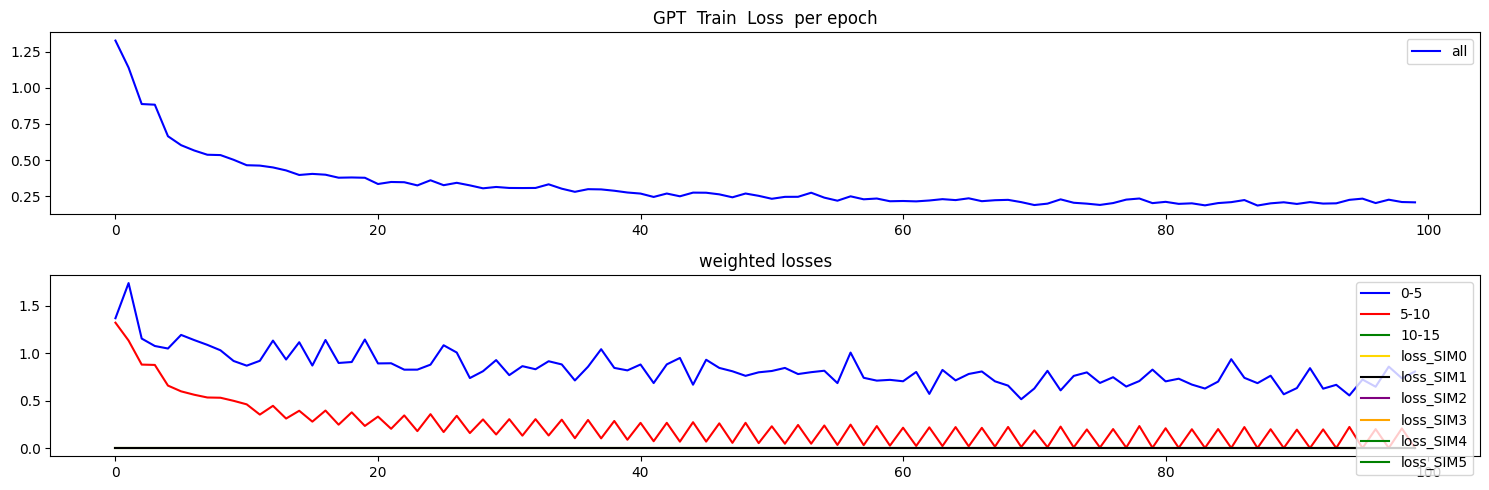

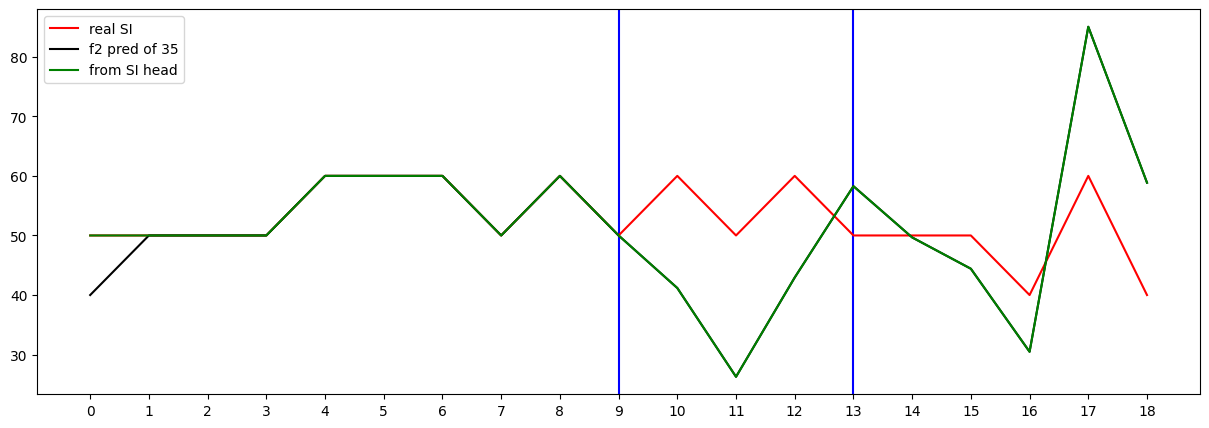

Testing R**2 - (all) - (no inputs):  0.998453105383748
Testing R**2 - (f2) - SI full (no inputs):  -9.823251361828298
Testing R**2 - SI head only (no inputs):  -9.823251361828298
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  0.0
3 ...t step R**2 (no inputs):  0.0
4 ...t step R**2 (no inputs):  -1.6666666666666665
5 ...t step R**2 (no inputs):  -0.6666666666666667
6 ...t step R**2 (no inputs):  -0.33333333333333326
7 ...t step R**2 (no inputs):  -0.7500000166893006
8 ...t step R**2 (no inputs):  -1.0
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -66.5034182065066
2 ...index R**2 (no inputs):  -9.823251361828298
3 ...index R**2 (no inputs):  -95.73957540621575
4 ...index R**2 (no inputs):  -269.8970618607712
5 ...index R**2 (no inputs):  -264.5926814847748
6 ...index R**2 (no inputs):  0.0
7 ...index R**2 (no inputs):  -20.543413198394493
8 ...index R**2 (no inputs):  -51.3860579646584
9 ...index R**2 (no inputs):  -21.935584141275857
10 ...index R**

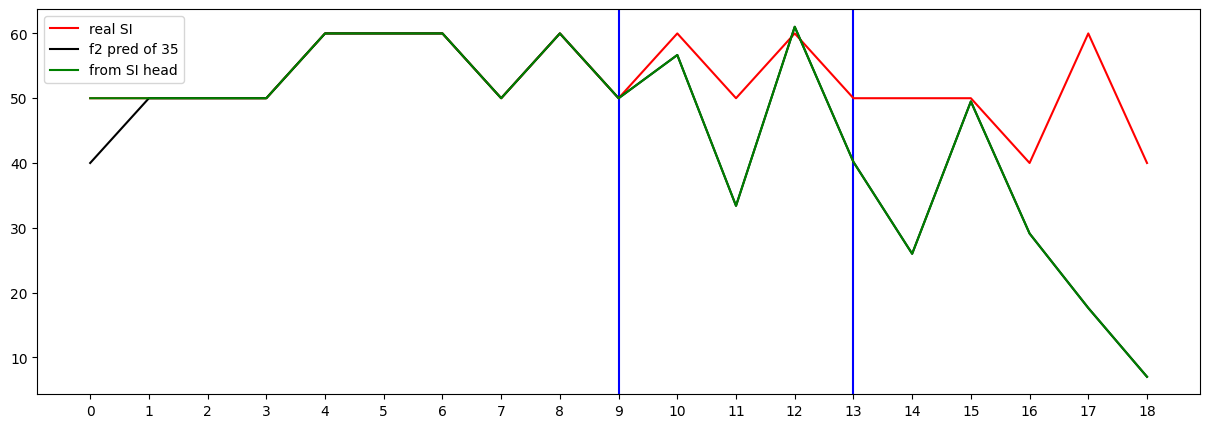

Testing R**2 - (all) - (no inputs):  0.9982715845318983
Testing R**2 - (f2) - SI full (no inputs):  -11.352589063644409
Testing R**2 - SI head only (no inputs):  -11.352589063644409
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  0.0
3 ...t step R**2 (no inputs):  0.0
4 ...t step R**2 (no inputs):  -1.6666666666666665
5 ...t step R**2 (no inputs):  -0.6666666666666667
6 ...t step R**2 (no inputs):  -0.33333333333333326
7 ...t step R**2 (no inputs):  -0.7500000166893006
8 ...t step R**2 (no inputs):  -1.0
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -136.65403662719643
2 ...index R**2 (no inputs):  -11.352589063644409
3 ...index R**2 (no inputs):  -180.70923589401335
4 ...index R**2 (no inputs):  -329.03753005886443
5 ...index R**2 (no inputs):  -364.0857351897981
6 ...index R**2 (no inputs):  0.0
7 ...index R**2 (no inputs):  -7.9260844974927895
8 ...index R**2 (no inputs):  -101.87803909901383
9 ...index R**2 (no inputs):  -32.257545229596744
10 ..

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_200to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_200to500.append( res_pred )


[0] Train Loss: 1.314463
Loss_SI: 1.3784147500991821 Loss_all: 1.3078210353851318
===
[50] Train Loss: 0.297551
Loss_SI: 0.9155144095420837 Loss_all: 0.2954566776752472
===


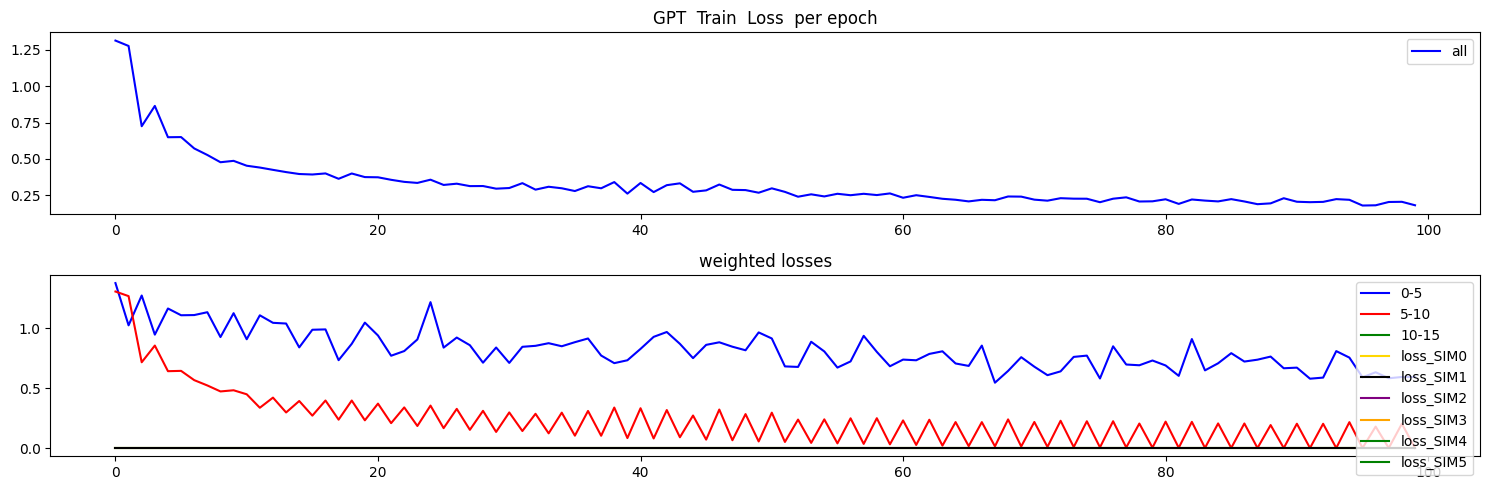

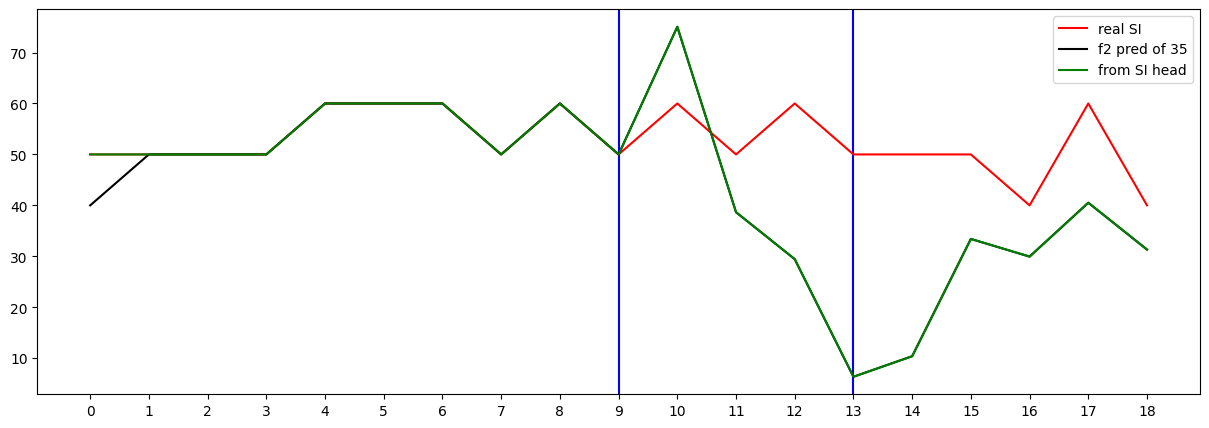

Testing R**2 - (all) - (no inputs):  0.9979403945138008
Testing R**2 - (f2) - SI full (no inputs):  -14.684191242907879
Testing R**2 - SI head only (no inputs):  -14.684191242907879
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  0.0
3 ...t step R**2 (no inputs):  0.0
4 ...t step R**2 (no inputs):  -1.6666656494140626
5 ...t step R**2 (no inputs):  -0.6666660308837891
6 ...t step R**2 (no inputs):  -0.3333328247070313
7 ...t step R**2 (no inputs):  -0.7499995716412822
8 ...t step R**2 (no inputs):  -0.9999996185302735
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -44.365173182978545
2 ...index R**2 (no inputs):  -14.684191242907879
3 ...index R**2 (no inputs):  -196.52699555648897
4 ...index R**2 (no inputs):  -24.453264030731898
5 ...index R**2 (no inputs):  -153.21351294806755
6 ...index R**2 (no inputs):  0.0
7 ...index R**2 (no inputs):  -16.736640964873533
8 ...index R**2 (no inputs):  -9.187108812065922
9 ...index R**2 (no inputs):  -86.1282870

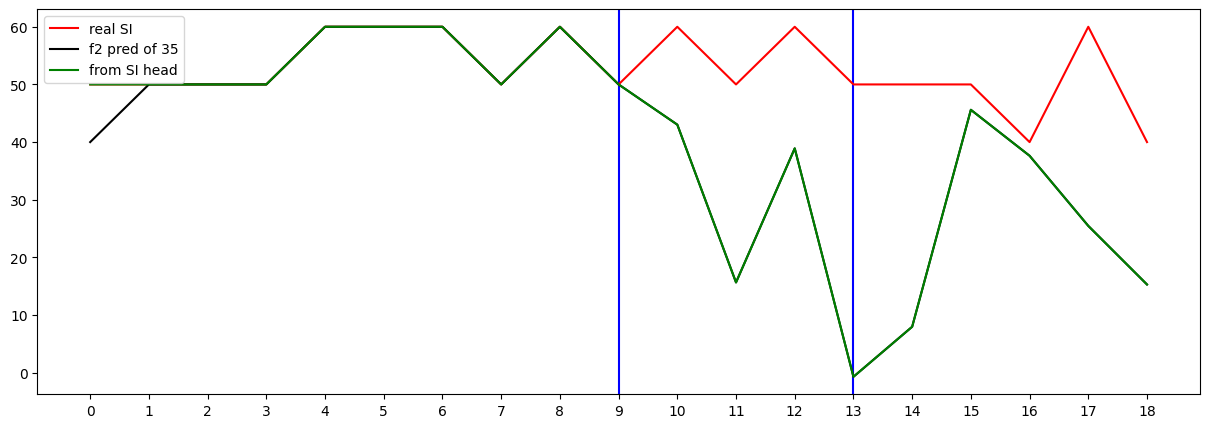

Testing R**2 - (all) - (no inputs):  0.9974358660514677
Testing R**2 - (f2) - SI full (no inputs):  -20.053909069598795
Testing R**2 - SI head only (no inputs):  -20.053909069598795
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  0.0
3 ...t step R**2 (no inputs):  0.0
4 ...t step R**2 (no inputs):  -1.6666656494140626
5 ...t step R**2 (no inputs):  -0.6666660308837891
6 ...t step R**2 (no inputs):  -0.3333328247070313
7 ...t step R**2 (no inputs):  -0.7499995716412822
8 ...t step R**2 (no inputs):  -0.9999996185302735
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -31.34562145129199
2 ...index R**2 (no inputs):  -20.053909069598795
3 ...index R**2 (no inputs):  -356.331613196724
4 ...index R**2 (no inputs):  -15.467603961929619
5 ...index R**2 (no inputs):  -246.97235108816716
6 ...index R**2 (no inputs):  0.0
7 ...index R**2 (no inputs):  -58.44900935883799
8 ...index R**2 (no inputs):  -6.017292216056888
9 ...index R**2 (no inputs):  -166.0257505794

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, model_DPO, x_means, x_standard_devs, 9  )
    inferenceGPT_obj.DPO_all_real_si_100to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_100to500.append( res_pred )



[0] Train Loss: 1.323629
Loss_SI: 1.520257592201233 Loss_all: 1.3172944784164429
===
[50] Train Loss: 0.265671
Loss_SI: 0.8232812881469727 Loss_all: 0.2635899484157562
===


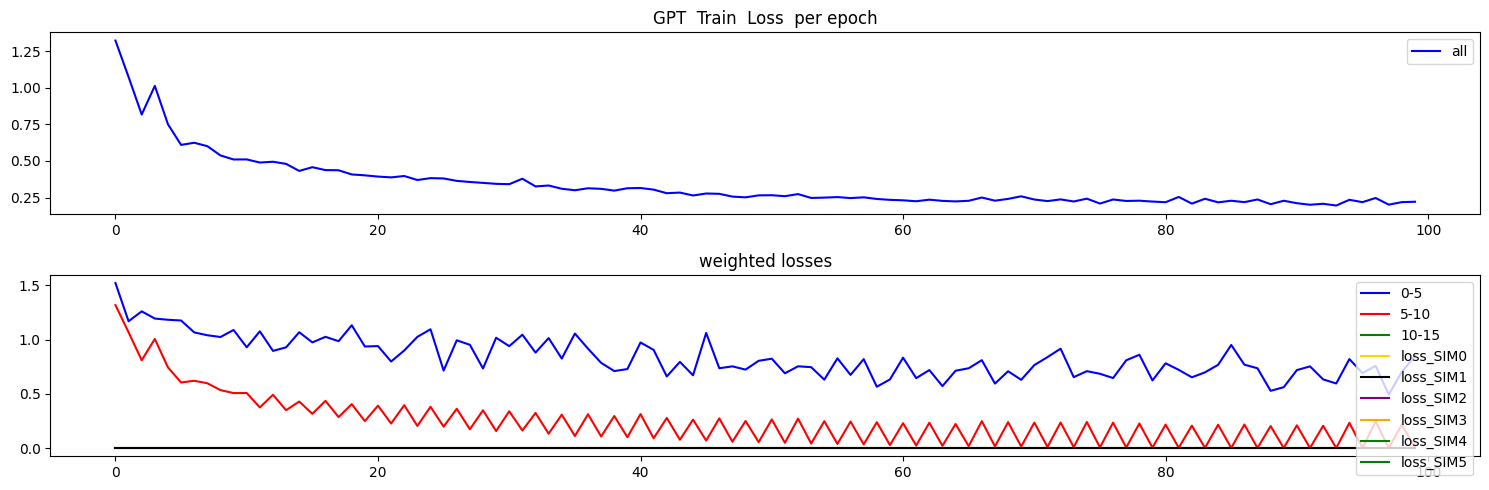

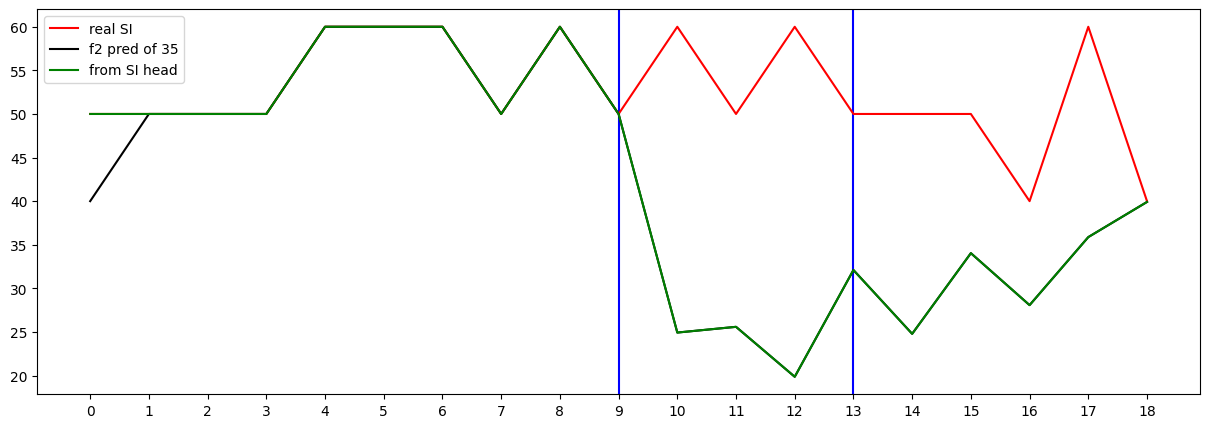

Testing R**2 - (all) - (no inputs):  0.998352720522722
Testing R**2 - (f2) - SI full (no inputs):  -11.127936520576476
Testing R**2 - SI head only (no inputs):  -11.127936520576476
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  0.0
3 ...t step R**2 (no inputs):  0.0
4 ...t step R**2 (no inputs):  -1.6666666666666665
5 ...t step R**2 (no inputs):  -0.6666666666666667
6 ...t step R**2 (no inputs):  -0.33333333333333326
7 ...t step R**2 (no inputs):  -0.7500000166893006
8 ...t step R**2 (no inputs):  -1.0
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -106.21285653291713
2 ...index R**2 (no inputs):  -11.127936520576476
3 ...index R**2 (no inputs):  -170.53396442870178
4 ...index R**2 (no inputs):  -24.68217494124278
5 ...index R**2 (no inputs):  -159.0325768826578
6 ...index R**2 (no inputs):  0.0
7 ...index R**2 (no inputs):  -51.110592443644144
8 ...index R**2 (no inputs):  -0.7278897492182046
9 ...index R**2 (no inputs):  -33.725154757116485
10 ...i

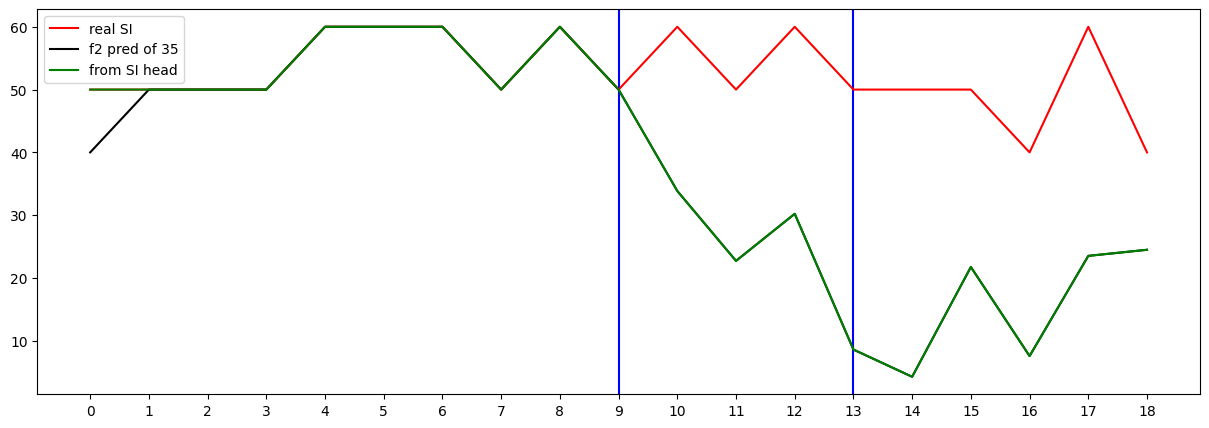

Testing R**2 - (all) - (no inputs):  0.9970185409871573
Testing R**2 - (f2) - SI full (no inputs):  -23.624580001831056
Testing R**2 - SI head only (no inputs):  -23.624580001831056
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  0.0
3 ...t step R**2 (no inputs):  0.0
4 ...t step R**2 (no inputs):  -1.6666666666666665
5 ...t step R**2 (no inputs):  -0.6666666666666667
6 ...t step R**2 (no inputs):  -0.33333333333333326
7 ...t step R**2 (no inputs):  -0.7500000166893006
8 ...t step R**2 (no inputs):  -1.0
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -241.32572444103653
2 ...index R**2 (no inputs):  -23.624580001831056
3 ...index R**2 (no inputs):  -553.252539646911
4 ...index R**2 (no inputs):  -231.2260503150894
5 ...index R**2 (no inputs):  -661.7972106534419
6 ...index R**2 (no inputs):  0.0
7 ...index R**2 (no inputs):  -122.01733279614857
8 ...index R**2 (no inputs):  -46.516475637685154
9 ...index R**2 (no inputs):  -111.38755840517771
10 ...in

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_000to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_000to500.append( res_pred )



## Run 3


In [43]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.271322
Loss_SI: 1.317992091178894 Loss_all: 1.2645882368087769
===
[50] Train Loss: 0.204175
Loss_SI: 0.6336678862571716 Loss_all: 0.19952769577503204
===


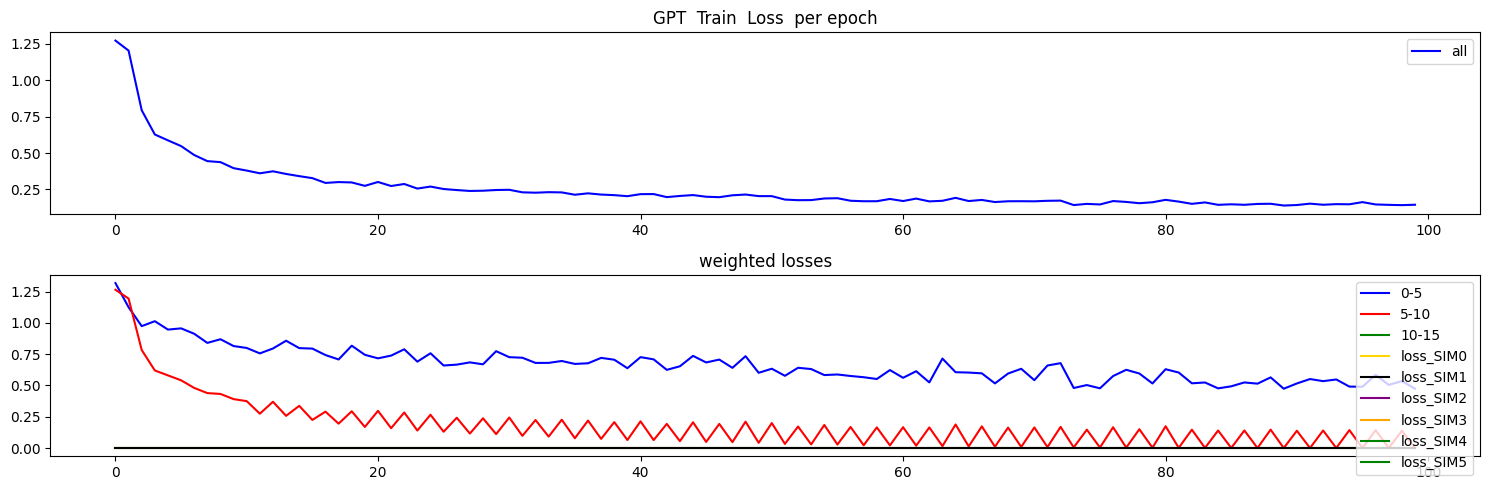

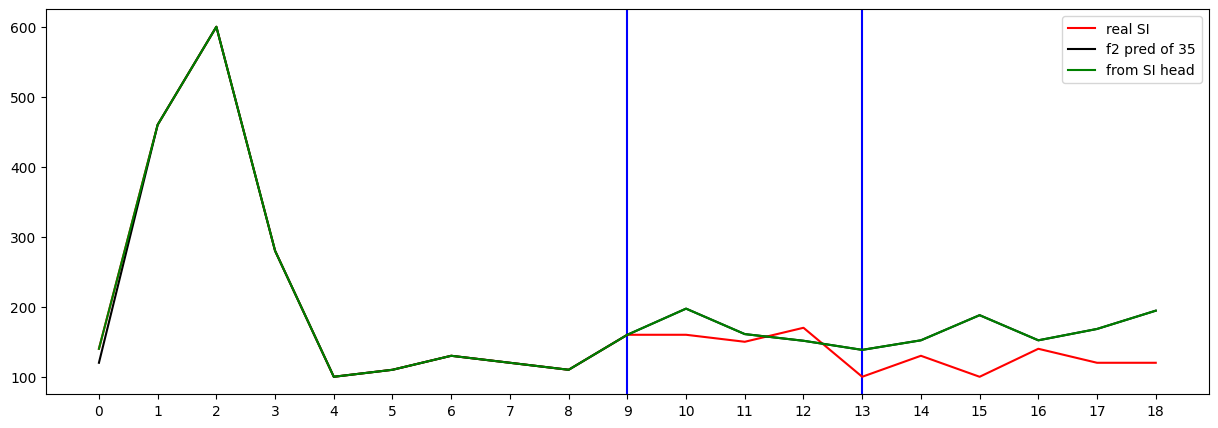

Testing R**2 - (all) - (no inputs):  0.9942343891345011
Testing R**2 - (f2) - SI full (no inputs):  -2.901609735034761
Testing R**2 - SI head only (no inputs):  -2.901609735034761
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -12.795918367346939
3 ...t step R**2 (no inputs):  -3.6165804815145206
4 ...t step R**2 (no inputs):  -0.9067796610169492
5 ...t step R**2 (no inputs):  -0.4097077244258873
6 ...t step R**2 (no inputs):  -0.23741994510521502
7 ...t step R**2 (no inputs):  -0.12495544773916367
8 ...t step R**2 (no inputs):  -0.04321017390047688
0 ...index R**2 (no inputs):  -2.9277914438087116
1 ...index R**2 (no inputs):  -46.704408792569154
2 ...index R**2 (no inputs):  -2.901609735034761
3 ...index R**2 (no inputs):  -24.88690310661954
4 ...index R**2 (no inputs):  -72.99612284213359
5 ...index R**2 (no inputs):  -9.588377879928554
6 ...index R**2 (no inputs):  -64.64866381937688
7 ...index R**2 (no inputs):  -4.400424270221496
8 ...index R**2 (no inputs):  -

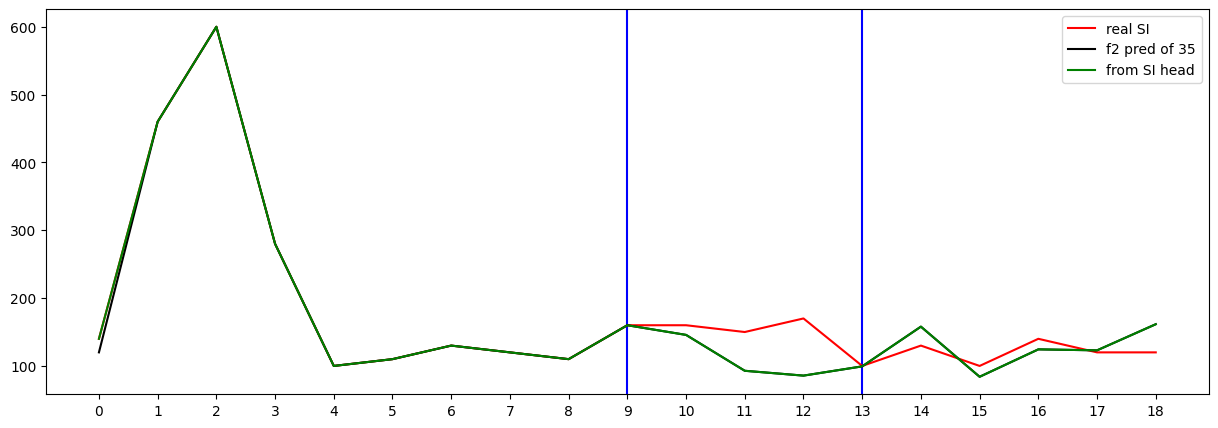

Testing R**2 - (all) - (no inputs):  0.9948591779149916
Testing R**2 - (f2) - SI full (no inputs):  -2.3551166691098895
Testing R**2 - SI head only (no inputs):  -2.3551166691098895
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -12.795918367346939
3 ...t step R**2 (no inputs):  -3.6165804815145206
4 ...t step R**2 (no inputs):  -0.9067796610169492
5 ...t step R**2 (no inputs):  -0.4097077244258873
6 ...t step R**2 (no inputs):  -0.23741994510521502
7 ...t step R**2 (no inputs):  -0.12495544773916367
8 ...t step R**2 (no inputs):  -0.04321017390047688
0 ...index R**2 (no inputs):  -2.3470264346931278
1 ...index R**2 (no inputs):  -37.59644445216063
2 ...index R**2 (no inputs):  -2.3551166691098895
3 ...index R**2 (no inputs):  -29.99005606674965
4 ...index R**2 (no inputs):  -67.48407821949087
5 ...index R**2 (no inputs):  -10.006338360430634
6 ...index R**2 (no inputs):  -59.66270953231407
7 ...index R**2 (no inputs):  -7.696368113387205
8 ...index R**2 (no inputs):

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk400to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_400to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_400to500.append( res_pred )


[0] Train Loss: 1.274213
Loss_SI: 1.300652027130127 Loss_all: 1.2677677869796753
===
[50] Train Loss: 0.233777
Loss_SI: 0.6044512987136841 Loss_all: 0.23077550530433655
===


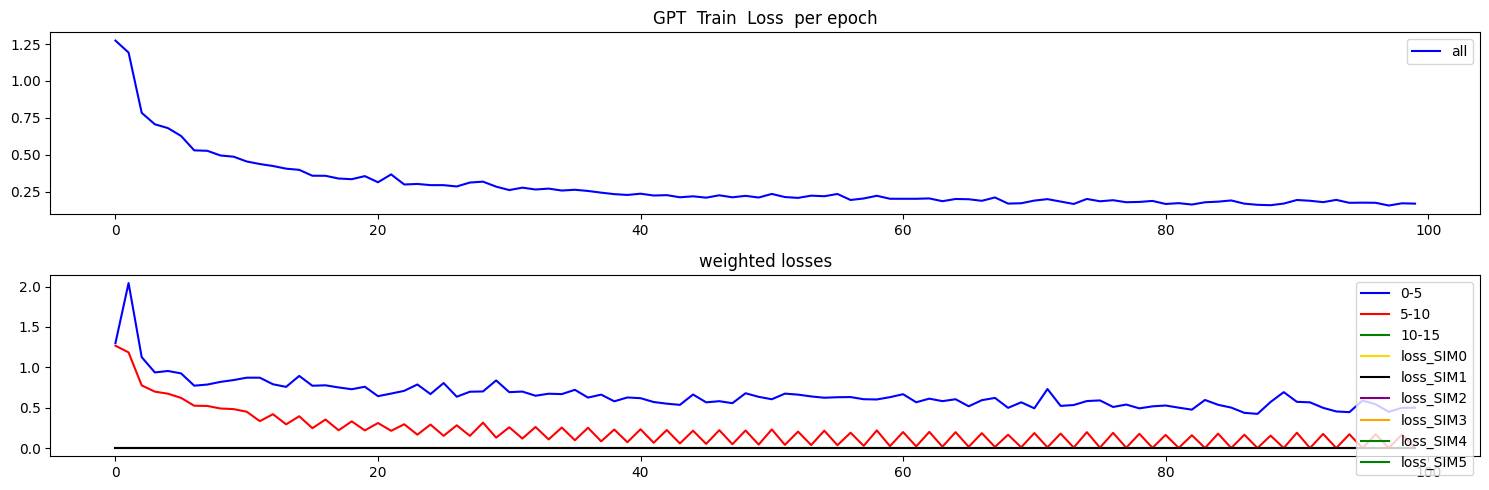

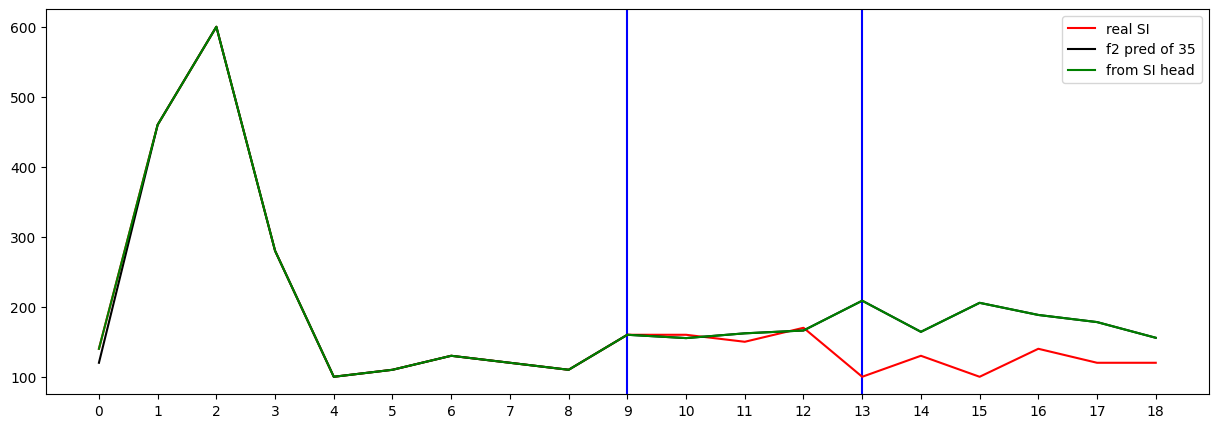

Testing R**2 - (all) - (no inputs):  0.9917629372572652
Testing R**2 - (f2) - SI full (no inputs):  -5.518254859106881
Testing R**2 - SI head only (no inputs):  -5.518254859106881
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -12.795928259067104
3 ...t step R**2 (no inputs):  -3.61658095774923
4 ...t step R**2 (no inputs):  -0.9067796292223198
5 ...t step R**2 (no inputs):  -0.40970771621128743
6 ...t step R**2 (no inputs):  -0.23741990711843597
7 ...t step R**2 (no inputs):  -0.12495539495416352
8 ...t step R**2 (no inputs):  -0.0432101440718744
0 ...index R**2 (no inputs):  -3.595855939384582
1 ...index R**2 (no inputs):  -111.37842094617717
2 ...index R**2 (no inputs):  -5.518254859106881
3 ...index R**2 (no inputs):  -38.17769859169813
4 ...index R**2 (no inputs):  -86.340082954261
5 ...index R**2 (no inputs):  -13.215245434747537
6 ...index R**2 (no inputs):  -47.51926090830971
7 ...index R**2 (no inputs):  -6.467410243514437
8 ...index R**2 (no inputs):  -1.56

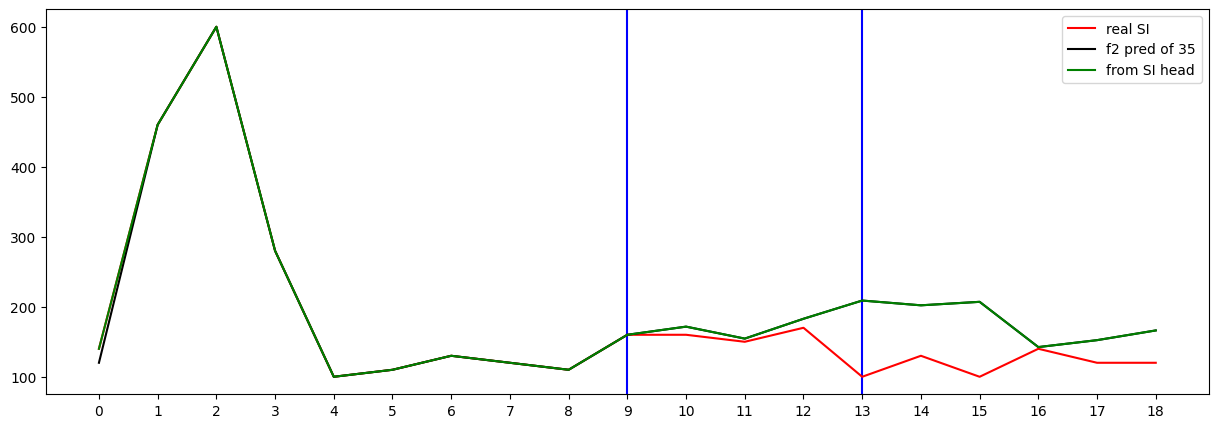

Testing R**2 - (all) - (no inputs):  0.9914798519345067
Testing R**2 - (f2) - SI full (no inputs):  -6.369609044392903
Testing R**2 - SI head only (no inputs):  -6.369609044392903
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -12.795928259067104
3 ...t step R**2 (no inputs):  -3.61658095774923
4 ...t step R**2 (no inputs):  -0.9067796292223198
5 ...t step R**2 (no inputs):  -0.40970771621128743
6 ...t step R**2 (no inputs):  -0.23741990711843597
7 ...t step R**2 (no inputs):  -0.12495539495416352
8 ...t step R**2 (no inputs):  -0.0432101440718744
0 ...index R**2 (no inputs):  -2.3589819478790908
1 ...index R**2 (no inputs):  -85.38886925174225
2 ...index R**2 (no inputs):  -6.369609044392903
3 ...index R**2 (no inputs):  -28.886892989166917
4 ...index R**2 (no inputs):  -80.00148102355487
5 ...index R**2 (no inputs):  -6.982800753582119
6 ...index R**2 (no inputs):  -37.74815680447159
7 ...index R**2 (no inputs):  -3.80934037039116
8 ...index R**2 (no inputs):  -4.1

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_300to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_300to500.append( res_pred )



[0] Train Loss: 1.295033
Loss_SI: 1.3163642883300781 Loss_all: 1.2887288331985474
===
[50] Train Loss: 0.223981
Loss_SI: 0.6385216116905212 Loss_all: 0.22150681912899017
===


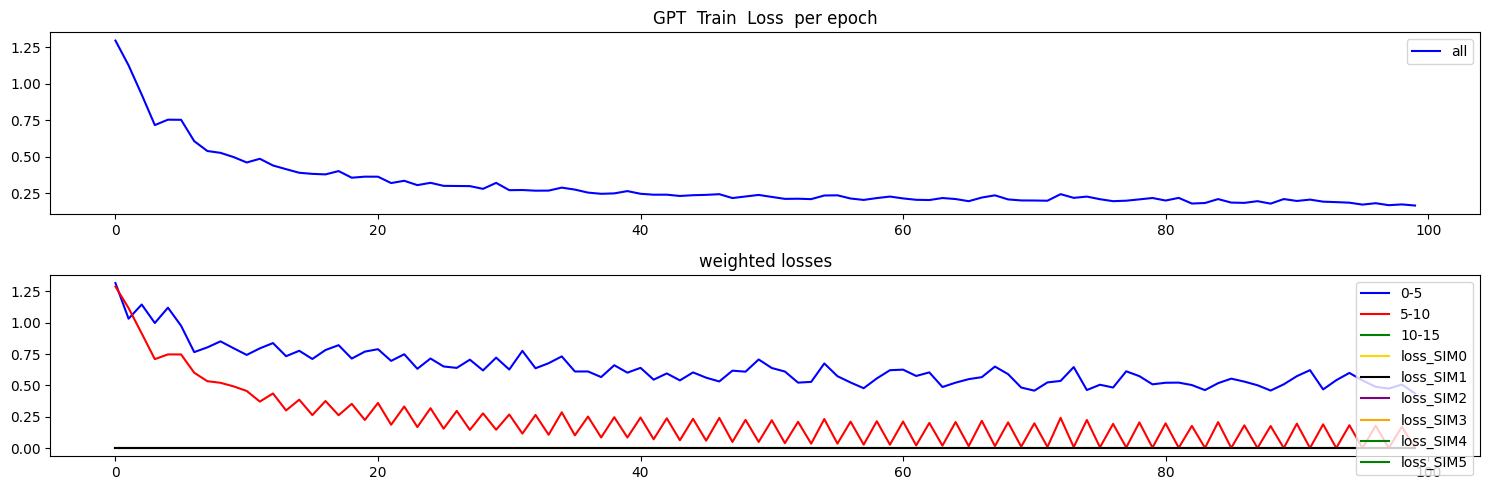

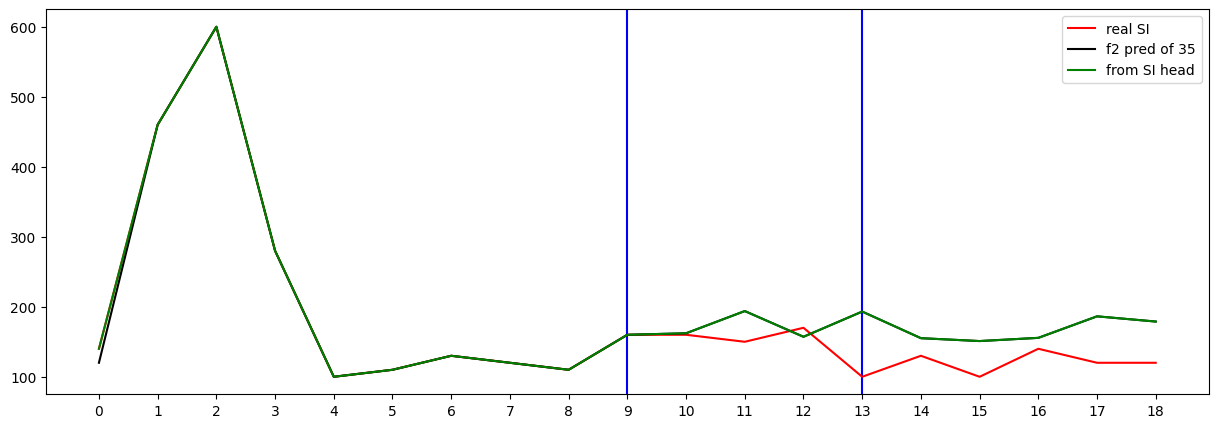

Testing R**2 - (all) - (no inputs):  0.9939139369798705
Testing R**2 - (f2) - SI full (no inputs):  -3.360338132949103
Testing R**2 - SI head only (no inputs):  -3.360338132949103
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -12.795918367346939
3 ...t step R**2 (no inputs):  -3.6165804815145206
4 ...t step R**2 (no inputs):  -0.9067796610169492
5 ...t step R**2 (no inputs):  -0.4097077244258873
6 ...t step R**2 (no inputs):  -0.23741994510521502
7 ...t step R**2 (no inputs):  -0.12495544773916367
8 ...t step R**2 (no inputs):  -0.04321017390047688
0 ...index R**2 (no inputs):  -2.56807350516864
1 ...index R**2 (no inputs):  -84.70012009058892
2 ...index R**2 (no inputs):  -3.360338132949103
3 ...index R**2 (no inputs):  -10.878545294378664
4 ...index R**2 (no inputs):  -178.14610478264248
5 ...index R**2 (no inputs):  -6.764750881527466
6 ...index R**2 (no inputs):  -18.631396866577525
7 ...index R**2 (no inputs):  -23.75968832556024
8 ...index R**2 (no inputs):  -

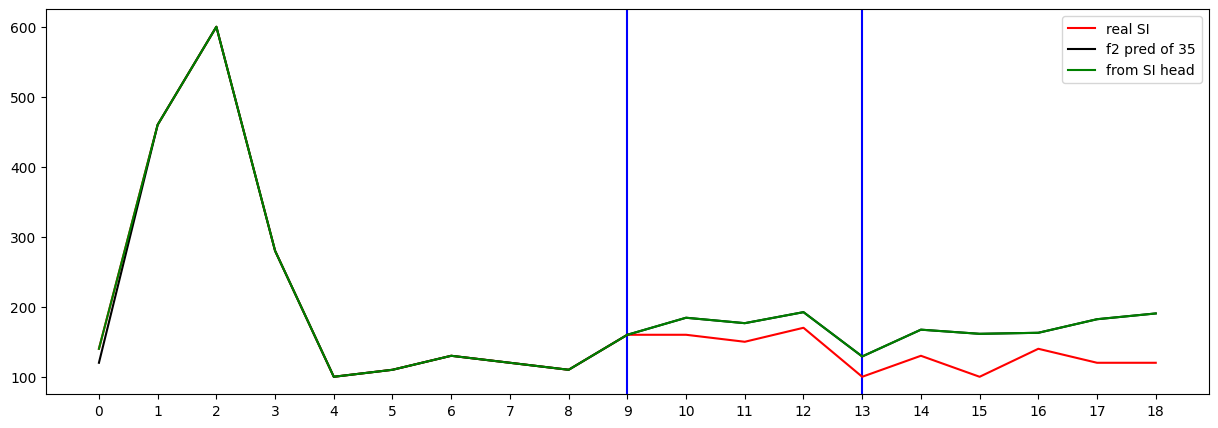

Testing R**2 - (all) - (no inputs):  0.993305856502187
Testing R**2 - (f2) - SI full (no inputs):  -4.473570118660018
Testing R**2 - SI head only (no inputs):  -4.473570118660018
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -12.795918367346939
3 ...t step R**2 (no inputs):  -3.6165804815145206
4 ...t step R**2 (no inputs):  -0.9067796610169492
5 ...t step R**2 (no inputs):  -0.4097077244258873
6 ...t step R**2 (no inputs):  -0.23741994510521502
7 ...t step R**2 (no inputs):  -0.12495544773916367
8 ...t step R**2 (no inputs):  -0.04321017390047688
0 ...index R**2 (no inputs):  -1.928368824598302
1 ...index R**2 (no inputs):  -93.16411966326488
2 ...index R**2 (no inputs):  -4.473570118660018
3 ...index R**2 (no inputs):  -5.584005291953417
4 ...index R**2 (no inputs):  -154.38729494983863
5 ...index R**2 (no inputs):  -3.039479805896682
6 ...index R**2 (no inputs):  -3.5969381947558476
7 ...index R**2 (no inputs):  -10.480240597275289
8 ...index R**2 (no inputs):  -

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_200to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_200to500.append( res_pred )


[0] Train Loss: 1.335359
Loss_SI: 1.4361718893051147 Loss_all: 1.3287239074707031
===
[50] Train Loss: 0.222592
Loss_SI: 0.49945268034935 Loss_all: 0.22053642570972443
===


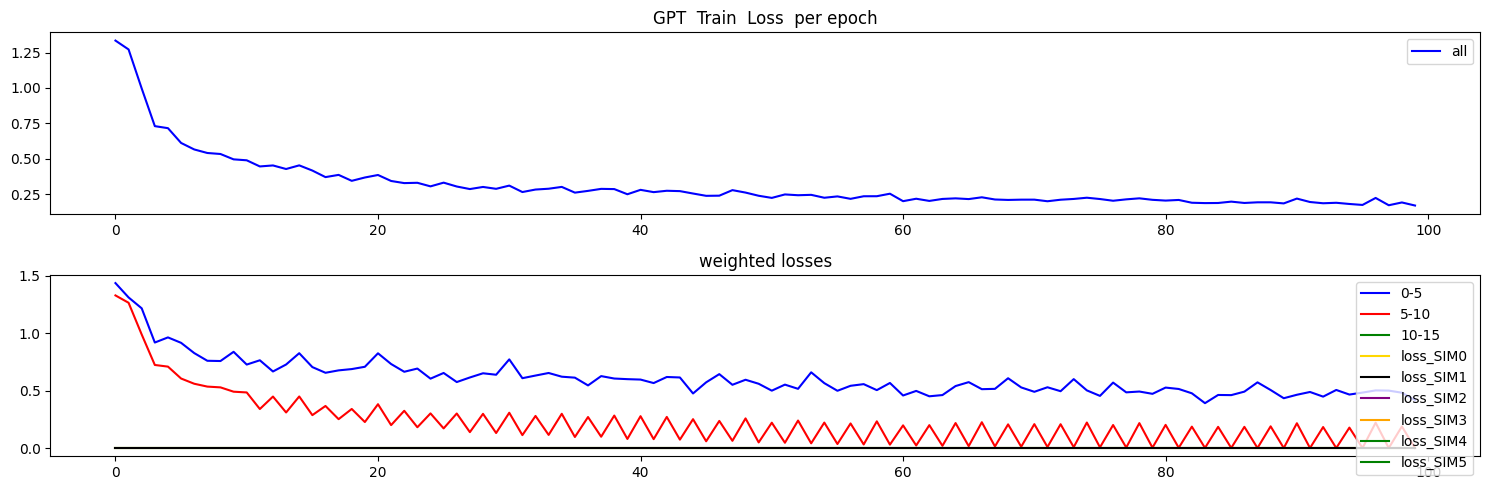

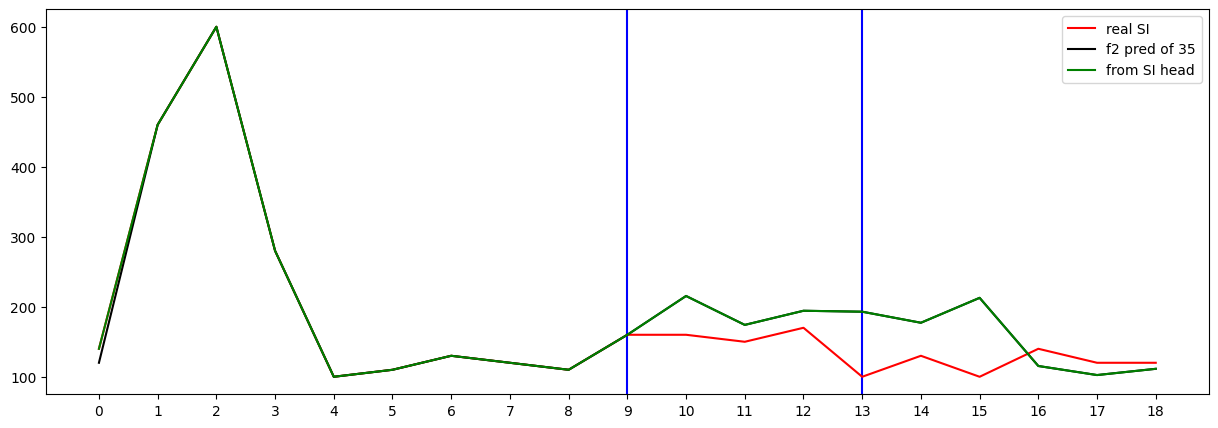

Testing R**2 - (all) - (no inputs):  0.9915178632911771
Testing R**2 - (f2) - SI full (no inputs):  -6.037369491032192
Testing R**2 - SI head only (no inputs):  -6.037369491032192
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -12.795918367346939
3 ...t step R**2 (no inputs):  -3.6165804815145206
4 ...t step R**2 (no inputs):  -0.9067796610169492
5 ...t step R**2 (no inputs):  -0.4097077244258873
6 ...t step R**2 (no inputs):  -0.23741994510521502
7 ...t step R**2 (no inputs):  -0.12495544773916367
8 ...t step R**2 (no inputs):  -0.04321017390047688
0 ...index R**2 (no inputs):  -1.471743778753976
1 ...index R**2 (no inputs):  -57.5488485200924
2 ...index R**2 (no inputs):  -6.037369491032192
3 ...index R**2 (no inputs):  -36.96691474817397
4 ...index R**2 (no inputs):  -94.64058754812676
5 ...index R**2 (no inputs):  -9.999601738176441
6 ...index R**2 (no inputs):  -8.198298558021193
7 ...index R**2 (no inputs):  -4.0603408063747715
8 ...index R**2 (no inputs):  -1.

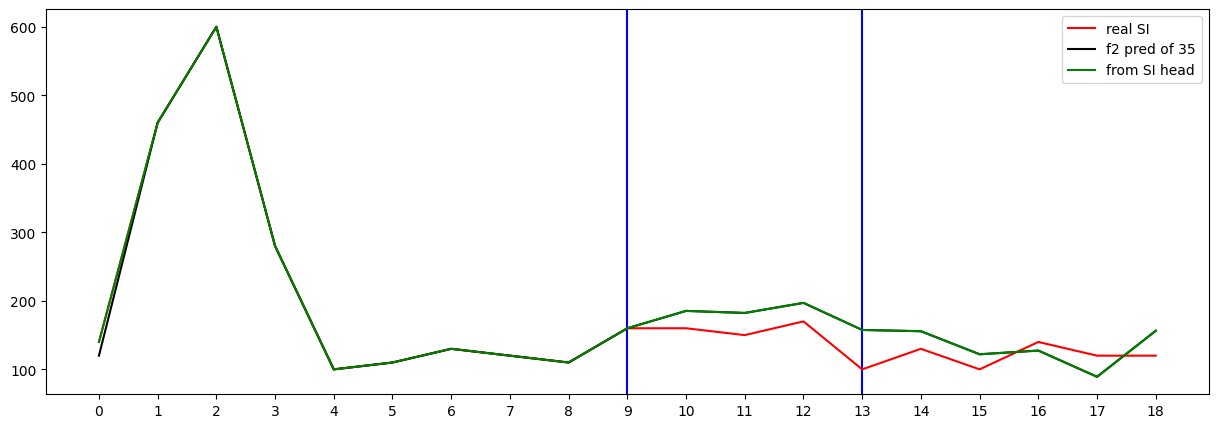

Testing R**2 - (all) - (no inputs):  0.9941138409862368
Testing R**2 - (f2) - SI full (no inputs):  -2.8735799135480606
Testing R**2 - SI head only (no inputs):  -2.8735799135480606
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -12.795918367346939
3 ...t step R**2 (no inputs):  -3.6165804815145206
4 ...t step R**2 (no inputs):  -0.9067796610169492
5 ...t step R**2 (no inputs):  -0.4097077244258873
6 ...t step R**2 (no inputs):  -0.23741994510521502
7 ...t step R**2 (no inputs):  -0.12495544773916367
8 ...t step R**2 (no inputs):  -0.04321017390047688
0 ...index R**2 (no inputs):  -1.391062686531329
1 ...index R**2 (no inputs):  -4.739948162763198
2 ...index R**2 (no inputs):  -2.8735799135480606
3 ...index R**2 (no inputs):  -38.97664476925425
4 ...index R**2 (no inputs):  -27.491130571088465
5 ...index R**2 (no inputs):  -10.685045763314722
6 ...index R**2 (no inputs):  -33.87724103909037
7 ...index R**2 (no inputs):  -7.4159307852804215
8 ...index R**2 (no inputs)

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_100to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_100to500.append( res_pred )
    
    
    

[0] Train Loss: 1.325608
Loss_SI: 1.217222809791565 Loss_all: 1.3196481466293335
===
[50] Train Loss: 0.231920
Loss_SI: 0.5721419453620911 Loss_all: 0.23002338409423828
===


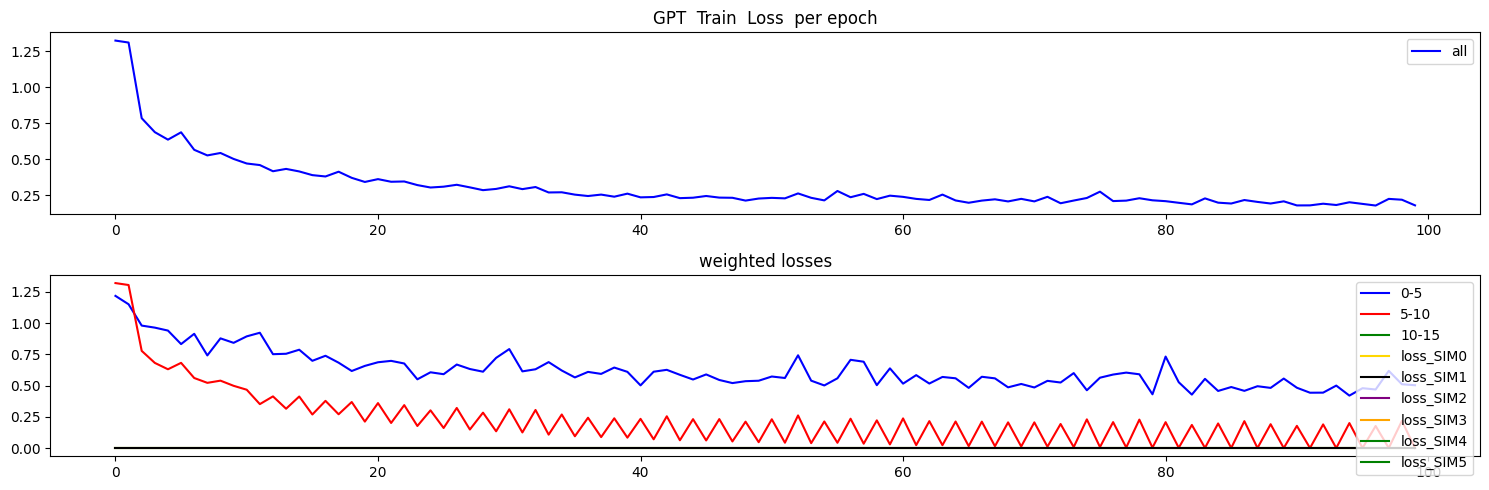

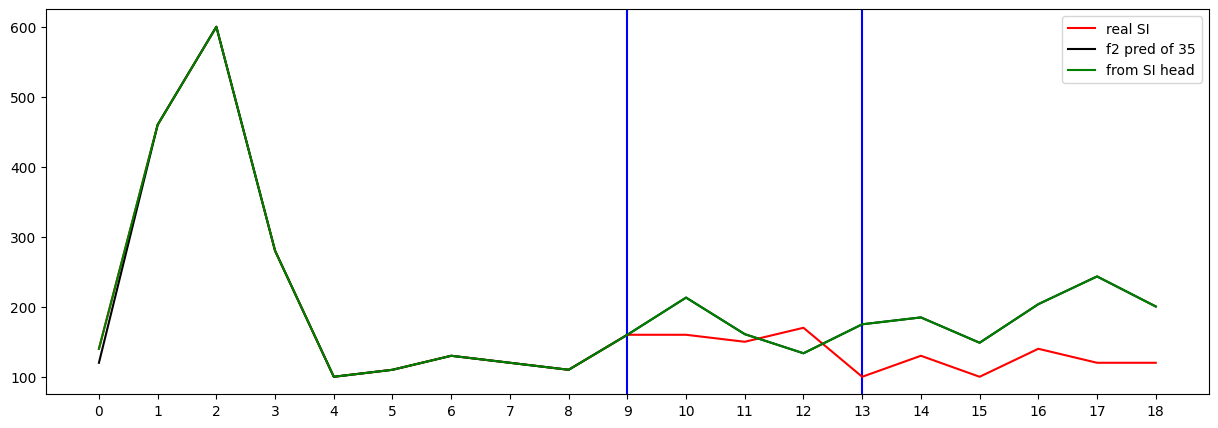

Testing R**2 - (all) - (no inputs):  0.9890566862976742
Testing R**2 - (f2) - SI full (no inputs):  -8.60969695499965
Testing R**2 - SI head only (no inputs):  -8.60969695499965
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -12.795918367346939
3 ...t step R**2 (no inputs):  -3.6165804815145206
4 ...t step R**2 (no inputs):  -0.9067796610169492
5 ...t step R**2 (no inputs):  -0.4097077244258873
6 ...t step R**2 (no inputs):  -0.23741994510521502
7 ...t step R**2 (no inputs):  -0.12495544773916367
8 ...t step R**2 (no inputs):  -0.04321017390047688
0 ...index R**2 (no inputs):  -4.507553826597256
1 ...index R**2 (no inputs):  -22.4682107237199
2 ...index R**2 (no inputs):  -8.60969695499965
3 ...index R**2 (no inputs):  -12.867811356702845
4 ...index R**2 (no inputs):  -121.52127893973525
5 ...index R**2 (no inputs):  -11.17995389939521
6 ...index R**2 (no inputs):  -55.38070026372401
7 ...index R**2 (no inputs):  -9.86239232759322
8 ...index R**2 (no inputs):  0.4467

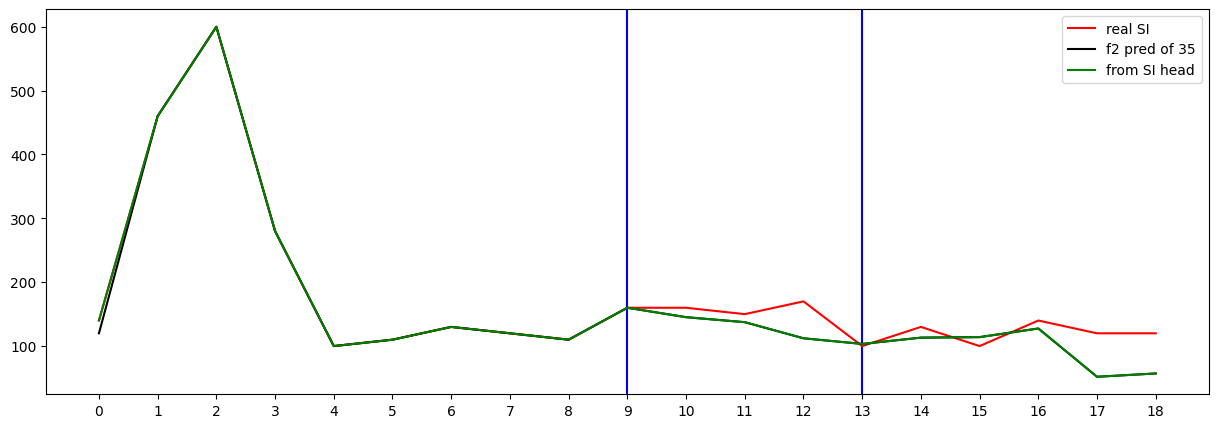

Testing R**2 - (all) - (no inputs):  0.994465556581481
Testing R**2 - (f2) - SI full (no inputs):  -2.4173309457869756
Testing R**2 - SI head only (no inputs):  -2.4173309457869756
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -12.795918367346939
3 ...t step R**2 (no inputs):  -3.6165804815145206
4 ...t step R**2 (no inputs):  -0.9067796610169492
5 ...t step R**2 (no inputs):  -0.4097077244258873
6 ...t step R**2 (no inputs):  -0.23741994510521502
7 ...t step R**2 (no inputs):  -0.12495544773916367
8 ...t step R**2 (no inputs):  -0.04321017390047688
0 ...index R**2 (no inputs):  -5.113516330187017
1 ...index R**2 (no inputs):  -10.22696545394567
2 ...index R**2 (no inputs):  -2.4173309457869756
3 ...index R**2 (no inputs):  -16.07503669243442
4 ...index R**2 (no inputs):  -73.81471535690788
5 ...index R**2 (no inputs):  -22.548651986577706
6 ...index R**2 (no inputs):  -107.8579532994824
7 ...index R**2 (no inputs):  -11.520640537256607
8 ...index R**2 (no inputs): 

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to500_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_000to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_000to500.append( res_pred )




## R2 over accumulated Runs


In [49]:

inferenceGPT_obj.print_ALL_R2s_THE_END()

inferenceGPT_obj.DPO_print_ALL_R2s_THE_END()


====================================400to500
1 400to500...1.....................R² on first n steps - R²: 0.6291905520819439
Naive_R2:....................................R²: 0.7773
..A..400to500..1Naive_R2:....................................R² 0.7772695869207382
RMSE:27.3836,MAE:16.6997,MASE:0.3036
1 400to500...1.......................R² on just step n - R²: 0.6291905520819439
Naive_R2:....................................R²: 0.7773
..B..400to500..1Naive_R2:....................................R² 0.7772695869207382
RMSE:27.3836,MAE:16.6997,MASE:0.3036
2 400to500...2.....................R² on first n steps - R²: 0.8131137984051213
Naive_R2:....................................R²: 0.6778
..A..400to500..2Naive_R2:....................................R² 0.677782416343689
RMSE:21.6152,MAE:14.8373,MASE:0.5707
2 400to500...2.......................R² on just step n - R²: 0.9375508530697969
Naive_R2:....................................R²: 0.9546
..B..400to500..2Naive_R2:...........................

In [50]:

summary = inferenceGPT_obj.summarize_eval_log()


pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


summary


Metric  \
0         400to500...1.....................R² on first n steps - R²:   
1    ..A..400to500..1Naive_R2:....................................R²   
2                                         ..A..400to500..1...RMSE...   
3                                          ..A..400to500..1...MAE...   
4                                         ..A..400to500..1...MASE...   
5         400to500...1.......................R² on just step n - R²:   
6    ..B..400to500..1Naive_R2:....................................R²   
7                                         ..B..400to500..1...RMSE...   
8                                          ..B..400to500..1...MAE...   
9                                         ..B..400to500..1...MASE...   
10        400to500...2.....................R² on first n steps - R²:   
11   ..A..400to500..2Naive_R2:....................................R²   
12                                        ..A..400to500..2...RMSE...   
13                                         ..A..400to500..2...MAE...   
14                                        ..A..400to500..2...MASE...   
15        400to500...2.......................R² on just step n - R²:   
16   ..B..400to500..2Naive_R2:....................................R²   
17                                        ..B..400to500..2...RMSE...   
18                                         ..B..400to500..2...MAE...   
19                                        ..B..400to500..2...MASE...   
20        400to500...3.....................R² on first n steps - R²:   
21   ..A..400to500..3Naive_R2:....................................R²   
22                                        ..A..400to500..3...RMSE...   
23                                         ..A..400to500..3...MAE...   
24                                        ..A..400to500..3...MASE...   
25        400to500...3.......................R² on just step n - R²:   
26   ..B..400to500..3Naive_R2:....................................R²   
27                                        ..B..400to500..3...RMSE...   
28                                         ..B..400to500..3...MAE...   
29                                        ..B..400to500..3...MASE...   
30        400to500...4.....................R² on first n steps - R²:   
31   ..A..400to500..4Naive_R2:....................................R²   
32                                        ..A..400to500..4...RMSE...   
33                                         ..A..400to500..4...MAE...   
34                                        ..A..400to500..4...MASE...   
35        400to500...4.......................R² on just step n - R²:   
36   ..B..400to500..4Naive_R2:....................................R²   
37                                        ..B..400to500..4...RMSE...   
38                                         ..B..400to500..4...MAE...   
39                                        ..B..400to500..4...MASE...   
40        400to500...5.....................R² on first n steps - R²:   
41   ..A..400to500..5Naive_R2:....................................R²   
42                                        ..A..400to500..5...RMSE...   
43                                         ..A..400to500..5...MAE...   
44                                        ..A..400to500..5...MASE...   
45        400to500...5.......................R² on just step n - R²:   
46   ..B..400to500..5Naive_R2:....................................R²   
47                                        ..B..400to500..5...RMSE...   
48                                         ..B..400to500..5...MAE...   
49                                        ..B..400to500..5...MASE...   
50        400to500...6.....................R² on first n steps - R²:   
51   ..A..400to500..6Naive_R2:....................................R²   
52                                        ..A..400to500..6...RMSE...   
53                                         ..A..400to500..6...MAE...   
54                                        ..A..400to500..6...MASE...   
55        400to500...6........

In [51]:


df = summary

# Assuming your DataFrame is called `df` and has a column named "Better"
total_rows = len(df)
after_wins = (df["Better"] == "After").sum()

percent_after = 100 * after_wins / total_rows

print(f"✅ 'After' was better in {after_wins} out of {total_rows} rows.")
print(f"📊 That’s {percent_after:.2f}% of the metrics.")


✅ 'After' was better in 264 out of 450 rows.
📊 That’s 58.67% of the metrics.



## Post Analysis


In [52]:

import metricsPOSTdebriefDF

metricsPOSTdebriefDF.metricsPOSTdebrief_main(df)


400to500...1 to 4
✅ 'After' was better in 8 out of 40 rows.
📊 That’s 20.00% of the metrics.
400to500...5 to 9
✅ 'After' was better in 25 out of 50 rows.
📊 That’s 50.00% of the metrics.
300to500...1 to 4
✅ 'After' was better in 21 out of 40 rows.
📊 That’s 52.50% of the metrics.
300to500...5 to 9
✅ 'After' was better in 20 out of 50 rows.
📊 That’s 40.00% of the metrics.
200to500...1 to 4
✅ 'After' was better in 15 out of 40 rows.
📊 That’s 37.50% of the metrics.
200to500...5 to 9
✅ 'After' was better in 20 out of 50 rows.
📊 That’s 40.00% of the metrics.
100to500...1 to 4
✅ 'After' was better in 35 out of 40 rows.
📊 That’s 87.50% of the metrics.
100to500...5 to 9
✅ 'After' was better in 40 out of 50 rows.
📊 That’s 80.00% of the metrics.
000to500...1 to 4
✅ 'After' was better in 35 out of 40 rows.
📊 That’s 87.50% of the metrics.
000to500...5 to 9
✅ 'After' was better in 45 out of 50 rows.
📊 That’s 90.00% of the metrics.
